# THIS DOES NOT MAKE SENSE

WE CANNOT VARY THE DISTANCES OF THE POINT CHARGES FITTING THE MADELUNG FIELD WITHOUT DESTROYING THE SYMMETRY AND IN SHORT ANY PHYSICAL MEANINGFUL RESULT

# data_from_sims FOLDER IS ALSO ALL WRONG

# Functions

In [244]:
import subprocess
from matplotlib import pyplot as plt
import os
import numpy as np

search_term_population = "Mulliken spin population per centre and basis function type"
lines_after_population=185

def search_in_file(file_path, search_term, lines_after):
    with open(file_path, 'r') as file:
        lines = file.readlines()
        
    results = []
    for i, line in enumerate(lines):
        if search_term in line:
            # Add the matching line
            results.append(line.strip())
            # Add up to `lines_after` lines after the match
            results.extend(line.strip() for line in lines[i+1:i+1+lines_after])
    
    return results

def population_summation(results):
    all_data = []
    for i in range(len(results)):
        if results[i] == 'Mulliken spin population per centre and basis function type':
            populations = []
            s = 0.0
            p = 0.0
            d = 0.0
            f = 0.0
            for t in range(181):

                if results[i+t+4] == '':
                    continue
                elif results[i+t+4][1] == 's':
                    s = s + float(results[i+t+4][9:15])
                elif results[i+t+4][1] == 'p':
                    p = p + float(results[i+t+4][9:15])
                elif results[i+t+4][1] == 'd':
                    d = d + float(results[i+t+4][9:15])
                elif results[i+t+4][1] == 'f':
                    f = f + float(results[i+t+4][9:15])
                else:
                    continue
            populations.append(s)
            populations.append(p)
            populations.append(d)
            populations.append(f)
            all_data.append(populations)
        else:
            continue
    return all_data

def rasscf_energies(results):
    energies = []
    for i in range(9):
        energies.append(-abs(float(results[i+3][44:57])))
    return energies


search_term_rasscf = "Final state energy(ies):"
lines_after_rasscf=11

def move_item_in_list(lst, old_index, new_index):
    """
    This function is used to reorganise certain elements of lists.
    Used for reorganising the files
    """
    item = lst.pop(old_index)  # Remove the item from old position
    lst.insert(new_index, item)  # Insert at new position
    return lst

def get_files(element: str) -> list:
    folder_path = "C:\\Users\\Mikel\\Documents\\00 - Universidades\\2 - RUG_Physics\\2024 - 2025\\Research Internship\\Initial simulations and tryouts\\1 electron\\non_rel_basis_9_active_Madelung\\data_from_sims"
    files = ["\\" + item for item in move_item_in_list([file for file in os.listdir(folder_path) if element in file], 18, 9)]
    return files

############################
# Bond Length factors list #
############################
bond_lengths_factors_list = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2]

def plotting_separated_graphs(V_positions, V_Energies, V_bond_lengths_factors_list, V_population_total, elem):
    print("Red is the s-orbital")
    print("Green is the p-orbital")
    print("Blue is the d-orbital")
    print("Black is the f-orbital")
    # Define the colors for each segment
    colors = ['red', 'green', 'blue', 'black']

    fig, ax = plt.subplots(6,4, figsize=(50,70), facecolor ='white')
    i=0
    j=0
    for pos, ener, bond_length, population in zip(V_positions, V_Energies, V_bond_lengths_factors_list, V_population_total):

        for pos, ener, population in zip(pos, ener, population):

            points = [0]
            for ratio in population:
                points.append(points[-1] + 0.4 * ratio)

            x_values = []
            y_values = []
            # Plot each segment with its respective color
            for t in range(len(colors)):
                x_values = np.linspace(pos+points[t], pos+points[t + 1], 100)
                y_values = np.full_like(x_values, ener)  # Specific value for y
                ax[i,j].plot(x_values, y_values, color=colors[t], linewidth=3.5)

            ax[i, j].set_title(f'Energy levels for {elem} at bond length: {bond_length}')
            ax[i, j].set_ylabel("Energy (Ev)")
            ax[i, j].set_xticks([0.5], ['CF'])
            ax[i, j].set_xlim(-1.0, 2.0)
        j = j +1
        if j == 4:
            j = 0
            i = i +1

    plt.show()

def plotting_joint_graphs(V_positions, V_Energies, V_bond_lengths_factors_list):
    normaliser_ground_value = V_Energies[19][0]
    fig, ax= plt.subplots(figsize=(30,10))
    i=0
    t=0
    #This is used for a dual y-axis, after the 6th measurement the axis are relabeled
    ax2 = ax.twinx()
    for pos, ener in zip(V_positions, V_Energies):
        if t >= 6:
            diff = ener[0] - normaliser_ground_value
            for j in range(len(pos)):
                pos[j] = pos[j] + i
                ener[j] = ener[j] - diff
            ax2.scatter(pos, ener, s=100, marker="_", linewidth=1.5, zorder=3)
        else:
            diff = ener[0] - normaliser_ground_value
            for j in range(len(pos)):
                pos[j] = pos[j] + i
                ener[j] = ener[j] - diff
            ax.scatter(pos, ener, s=100, marker="_", linewidth=1.5, zorder=3)
        i=i+3
        t=t+1
    plt.title("Energy levels with reescaling after 6th trial", fontsize=25)
    V_positions_xticks = [0.5,3.5,6.5,9.5,12.5,15.5,18.5,21.5,24.5,27.5,30.5,33.5,36.5,39.5,42.5,45.5,48.5,51.5,54.5,57.5]
    plt.xticks(V_positions_xticks, V_bond_lengths_factors_list)
    plt.axvline(17)
    plt.show()

def assign_positions_to_energy_values_based_on_their_relative_differences(numbers, threshold):
    
    # Step 1: Sort numbers
    numbers = sorted(numbers)

    # Step 2: Group numbers based on relative difference
    groups = []
    current_group = [numbers[0]]

    for i in range(1, len(numbers)):
        if abs(numbers[i] - current_group[-1]) <= threshold:
            current_group.append(numbers[i])
        else:
            groups.append(current_group)
            current_group = [numbers[i]]
    
    groups.append(current_group)  # Add the last group

    # Step 3: Assign values based on group size
    assignment_map = {
        1: [0.5],
        2: [0, 1],
        3: [0, 0.5, 1],
        5: [-0.5, 0, 0.5, 1, 1.5]
    }

    assigned_values = []
    for group in groups:
        size = len(group)
        if size in assignment_map:
            assigned_values.extend(assignment_map[size])
        else:  
            # If size is not in predefined mapping, distribute evenly
            assigned_values.extend(np.linspace(0, 1, size).tolist())

    return assigned_values

# Vanadium

Red is the s-orbital
Green is the p-orbital
Blue is the d-orbital
Black is the f-orbital


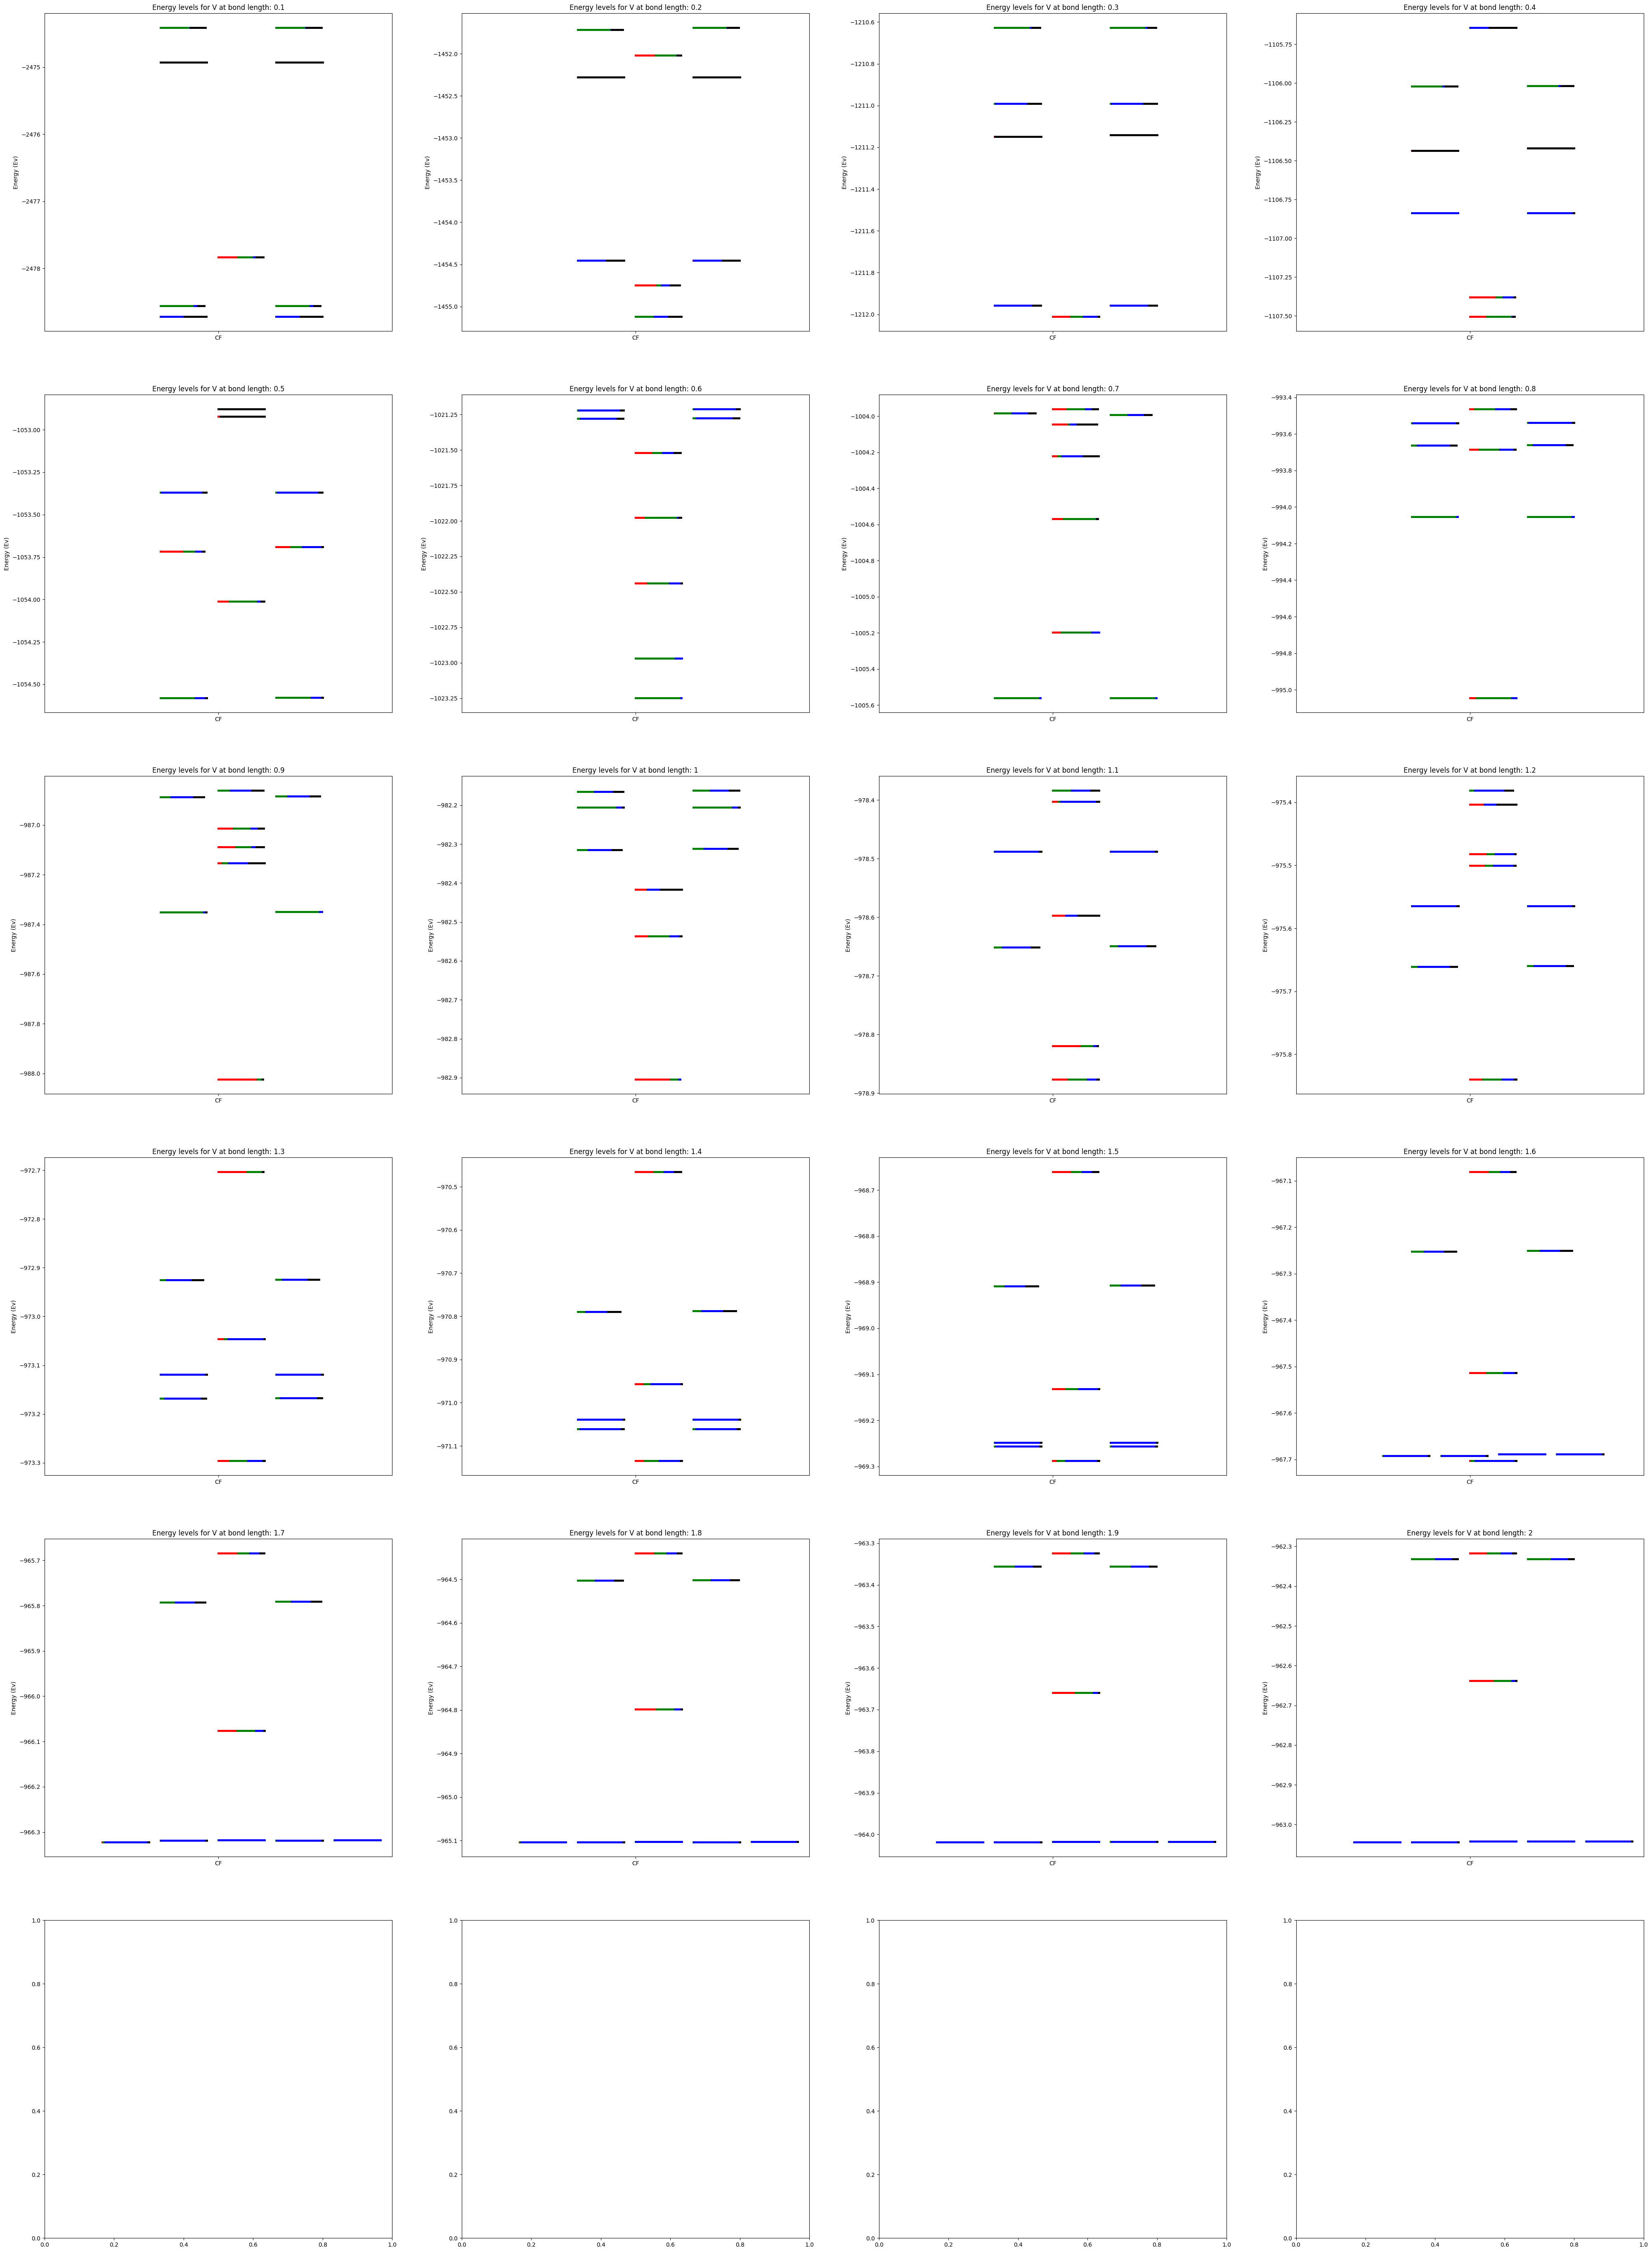

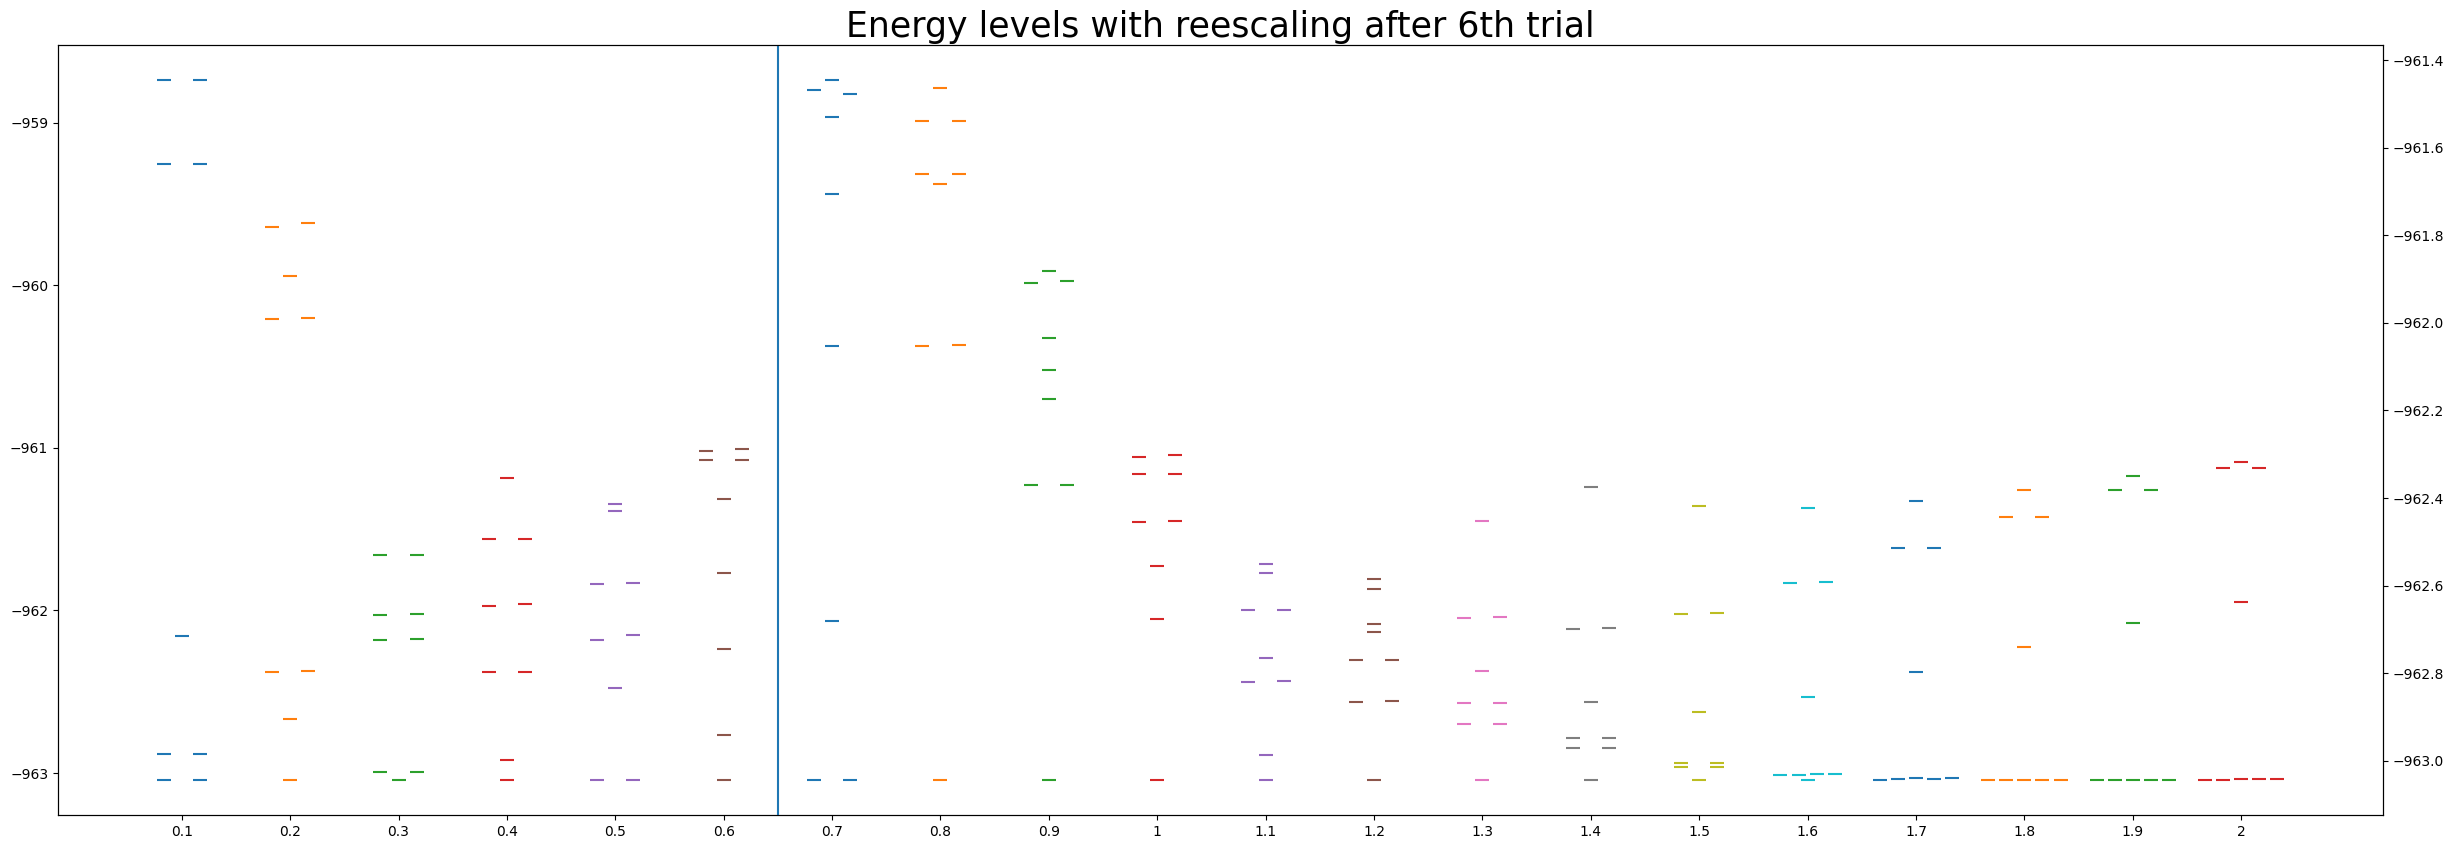

In [262]:
files  = get_files("vanadium")

V_Energies = []
V_population_total = []

for i in range(len(files)):
    V_Energies.append(rasscf_energies(search_in_file(r'c:\Users\Mikel\Documents\00 - Universidades\2 - RUG_Physics\2024 - 2025\Research Internship\Initial simulations and tryouts\1 electron\non_rel_basis_9_active_Madelung\data_from_sims' + files[i], search_term_rasscf, lines_after_rasscf)))
    V_population_total.append(population_summation(search_in_file(r'c:\Users\Mikel\Documents\00 - Universidades\2 - RUG_Physics\2024 - 2025\Research Internship\Initial simulations and tryouts\1 electron\non_rel_basis_9_active_Madelung\data_from_sims' + files[i], search_term_population, lines_after_population)))

V_1 = [0, 1, 1, 0, 0.5, 0, 1, 0, 1]
V_2 = [0.5, 0.5, 0, 1, 0, 1, 0.5, 0, 1]
V_3 = [0.5, 0, 1, 0, 1, 0, 1, 0, 1]
V_4 = [0.5, 0.5, 0, 1, 0, 1, 0, 1, 0.5]
V_5 = [0, 1, 0.5, 0, 1, 0, 1, 0.5, 0.5]
V_6 = [0.5, 0.5, 0.5, 0.5, 0.5, 0, 1, 0, 1]
V_7 = [0, 1, 0.5, 0.5, 0.5, 0.5, 1, 0, 0.5]
V_8 = [0.5, 0, 1, 0.5, 0, 1, 0, 1, 0.5]
V_9 = [0.5, 0, 1, 0.5, 0.5, 0.5, 0, 1, 0.5]
V_10 = [0.5, 0.5, 0.5, 0, 1, 0, 1, 0, 1]
V_11 = [0.5, 0.5, 0, 1, 0.5, 0, 1, 0.5, 0.5]
V_12 = [0.5, 0, 1, 0, 1, 0.5, 0.5, 0.5, 0.5]
V_13 = [0.5, 0, 1, 0, 1, 0.5, 0, 1, 0.5]
V_14 = [0.5, 0, 1, 0, 1, 0.5, 0, 1, 0.5]

V_15 = [0.5, 0, 1, 0, 1, 0.5, 0, 1, 0.5]
V_16 = [0.5, 0.25, -0.25, 0.75, 1.25, 0.5, 0, 1, 0.5]
V_17 = [-0.5, 0, 1, 0.5, 1.5, 0.5, 0, 1, 0.5]
V_18 = [-0.5, 0, 1, 0.5, 1.5, 0.5, 0, 1, 0.5]
V_19 = [-0.5, 0, 1, 0.5, 1.5, 0.5, 0, 1, 0.5]
V_20 = [-0.5, 0, 1, 0.5, 1.5, 0.5, 0, 1, 0.5]
V_positions = [V_1, V_2, V_3, V_4, V_5, V_6, V_7, V_8, V_9, V_10, V_11, V_12, V_13, V_14, V_15, V_16, V_17, V_18, V_19, V_20]


#V_positions = []
#for i in range(len(V_Energies)):
#    V_positions.append(assign_positions_to_energy_values_based_on_their_relative_differences(V_Energies[i], threshold=0.01))


plotting_separated_graphs(V_positions, V_Energies, bond_lengths_factors_list, V_population_total, "V")
plotting_joint_graphs(V_positions, V_Energies, bond_lengths_factors_list)

# Chromium

Red is the s-orbital
Green is the p-orbital
Blue is the d-orbital
Black is the f-orbital


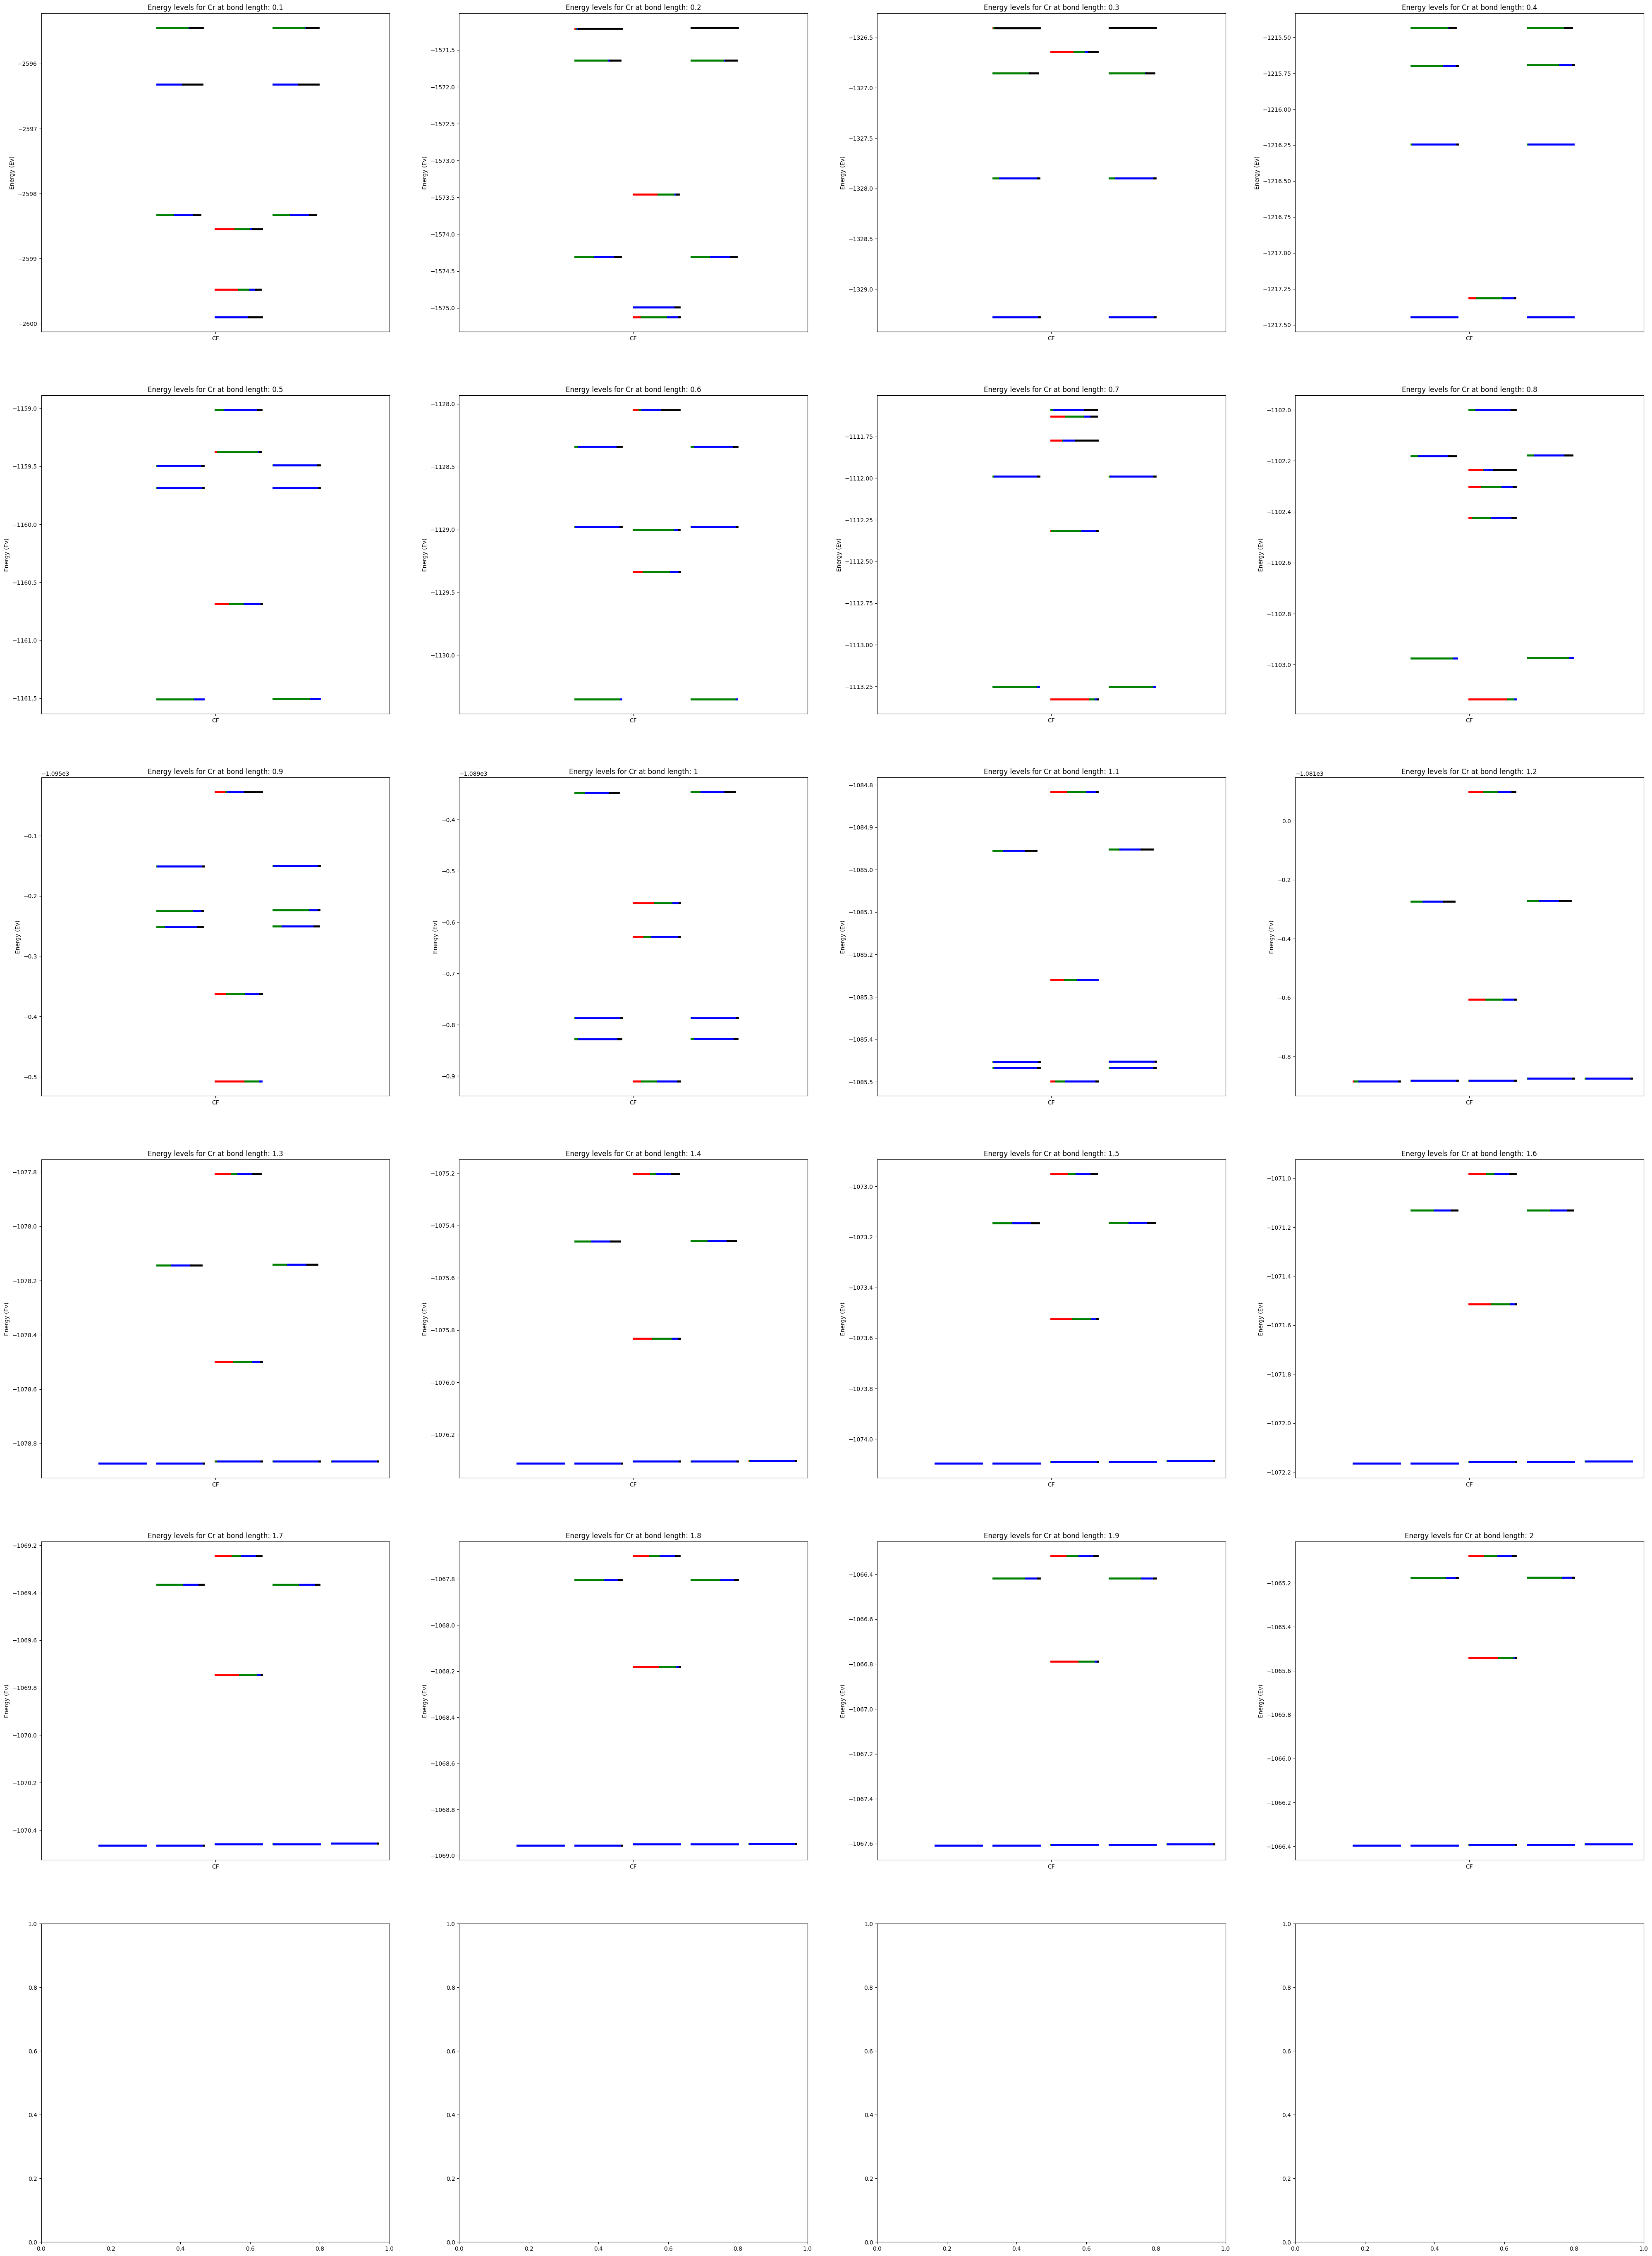

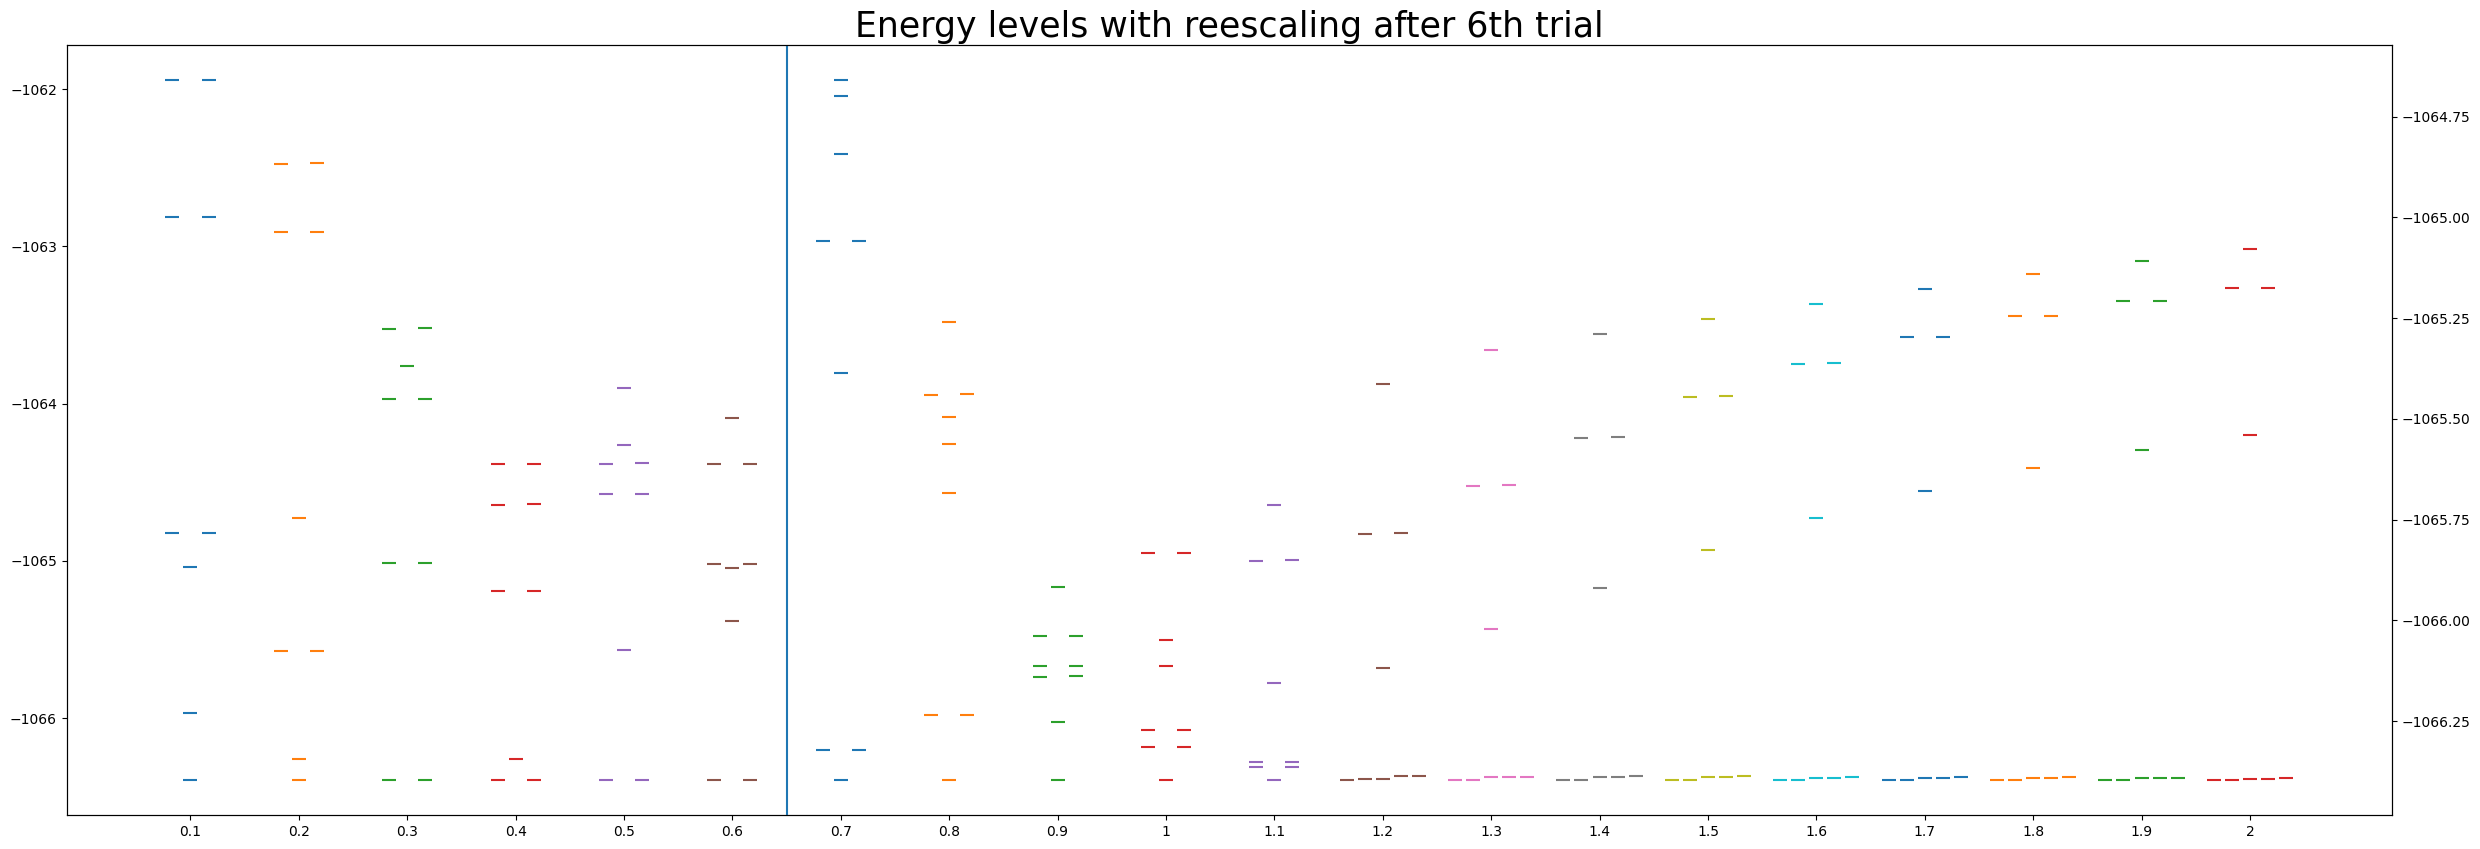

In [193]:
files  = get_files("chromium")

Cr_Energies = []
Cr_population_total = []

for i in range(len(files)):
    Cr_Energies.append(rasscf_energies(search_in_file(r'c:\Users\Mikel\Documents\00 - Universidades\2 - RUG_Physics\2024 - 2025\Research Internship\Initial simulations and tryouts\1 electron\non_rel_basis_9_active_Madelung\data_from_sims' + files[i], search_term_rasscf, lines_after_rasscf)))
    Cr_population_total.append(population_summation(search_in_file(r'c:\Users\Mikel\Documents\00 - Universidades\2 - RUG_Physics\2024 - 2025\Research Internship\Initial simulations and tryouts\1 electron\non_rel_basis_9_active_Madelung\data_from_sims' + files[i], search_term_population, lines_after_population)))

Cr_1 = [0.5, 0.5, 0.5, 0, 1, 0, 1, 0, 1]
Cr_2 = [0.5, 0.5, 0, 1, 0.5, 0, 1, 0, 1]
Cr_3 = [0, 1, 0, 1, 0, 1, 0.5, 1, 0]
Cr_4 = [0, 1, 0.5, 0, 1, 0, 1, 0, 1]
Cr_5 = [0, 1, 0.5, 0, 1, 0, 1, 0.5, 0.5]
Cr_6 = [0, 1, 0.5, 0, 1, 0.5, 1, 0, 0.5]
Cr_7 = [0.5, 1, 0, 0.5, 1, 0, 0.5, 0.5, 0.5]
Cr_8 = [0.5, 0, 1, 0.5, 0.5, 0.5, 0, 1, 0.5]
Cr_9 = [0.5, 0.5, 1, 0, 0, 1, 0, 1, 0.5]
Cr_10 = [0.5, 1, 0, 1, 0, 0.5, 0.5, 1, 0]
Cr_11 = [0.5, 0, 1, 0, 1, 0.5, 1, 0, 0.5]
Cr_12 = [-0.5, 0, 0.5, 1, 1.5, 0.5, 1, 0, 0.5]
Cr_13 = [-0.5, 0, 0.5, 1, 1.5,  0.5, 0, 1, 0.5]
Cr_14 = [-0.5, 0, 0.5, 1, 1.5,  0.5, 0, 1, 0.5]
Cr_15 = [-0.5, 0, 0.5, 1, 1.5,  0.5, 0, 1, 0.5]
Cr_16 = [-0.5, 0, 0.5, 1, 1.5,  0.5, 0, 1, 0.5]
Cr_17 = [-0.5, 0, 0.5, 1, 1.5,  0.5, 0, 1, 0.5]
Cr_18 = [-0.5, 0, 0.5, 1, 1.5,  0.5, 0, 1, 0.5]
Cr_19 = [-0.5, 0, 0.5, 1, 1.5,  0.5, 0, 1, 0.5]
Cr_20 = [-0.5, 0, 0.5, 1, 1.5,  0.5, 0, 1, 0.5]
Cr_positions = [Cr_1, Cr_2, Cr_3, Cr_4, Cr_5, Cr_6, Cr_7, Cr_8, Cr_9, Cr_10, Cr_11, Cr_12, Cr_13, Cr_14, Cr_15, Cr_16, Cr_17, Cr_18, Cr_19, Cr_20]


Cr_positions = []
for i in range(len(Cr_Energies)):
    Cr_positions.append(assign_positions_to_energy_values_based_on_their_relative_differences(Cr_Energies[i], threshold=0.01))

plotting_separated_graphs(Cr_positions, Cr_Energies, bond_lengths_factors_list, Cr_population_total, "Cr")
plotting_joint_graphs(Cr_positions, Cr_Energies, bond_lengths_factors_list)

# Niobium

Red is the s-orbital
Green is the p-orbital
Blue is the d-orbital
Black is the f-orbital


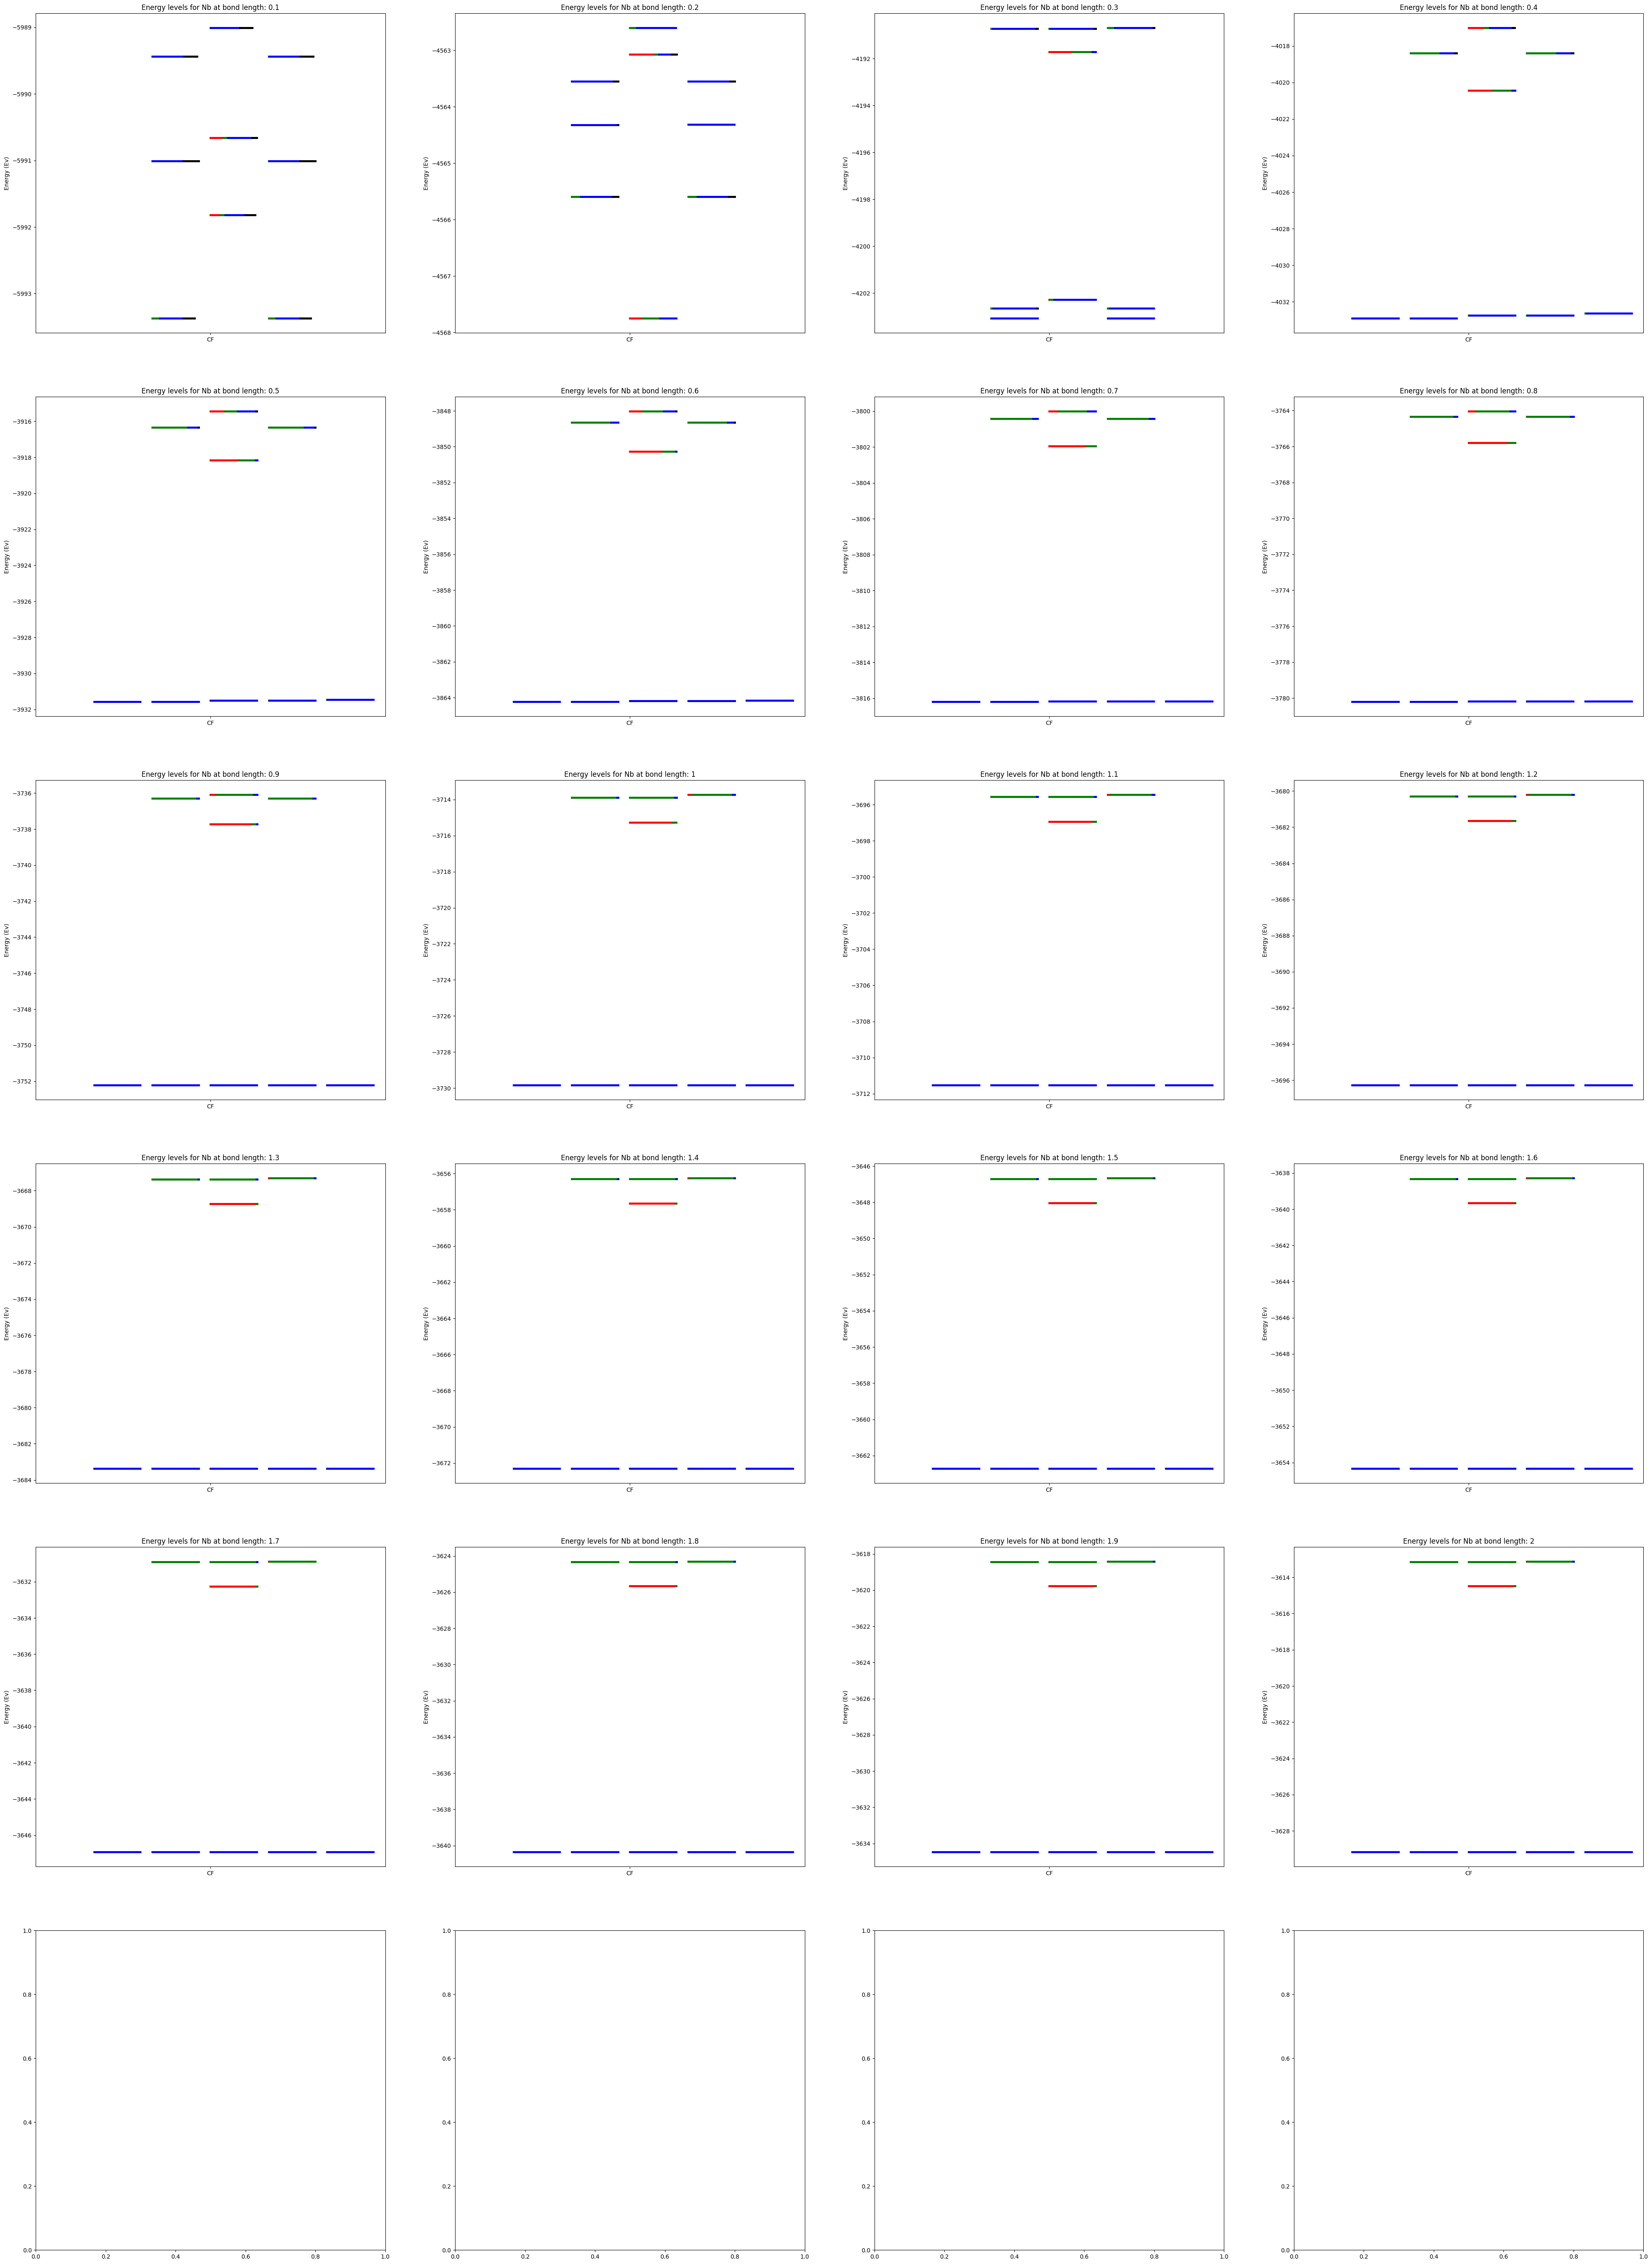

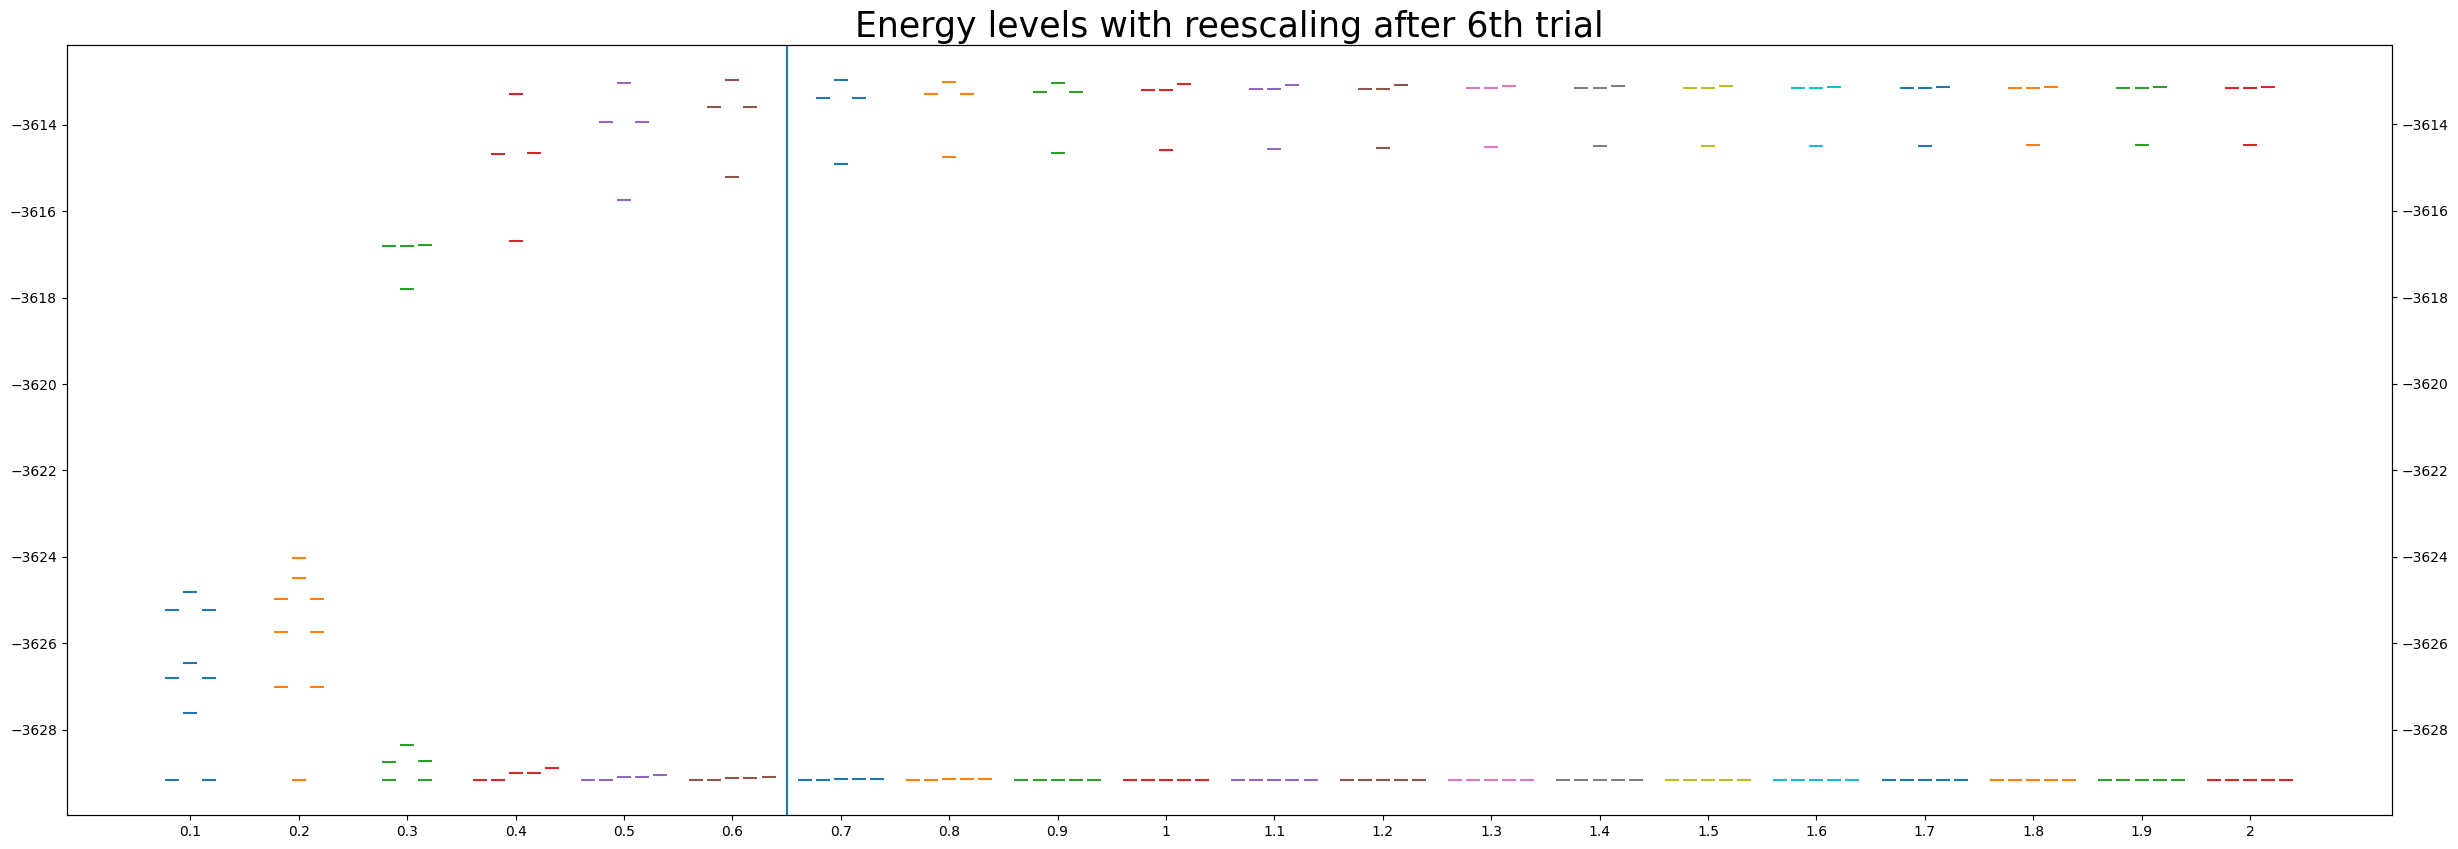

In [270]:
files  = get_files("niobium")

Nb_Energies = []
Nb_population_total = []

for i in range(len(files)):
    Nb_Energies.append(rasscf_energies(search_in_file(r'c:\Users\Mikel\Documents\00 - Universidades\2 - RUG_Physics\2024 - 2025\Research Internship\Initial simulations and tryouts\1 electron\non_rel_basis_9_active_Madelung\data_from_sims' + files[i], search_term_rasscf, lines_after_rasscf)))
    Nb_population_total.append(population_summation(search_in_file(r'c:\Users\Mikel\Documents\00 - Universidades\2 - RUG_Physics\2024 - 2025\Research Internship\Initial simulations and tryouts\1 electron\non_rel_basis_9_active_Madelung\data_from_sims' + files[i], search_term_population, lines_after_population)))

Nb_1 = [0.5, 0.5, 0.5, 0, 1, 0, 1, 0, 1]
Nb_2 = [0.5, 0.5, 0, 1, 0.5, 0, 1, 0, 1]
Nb_3 = [0, 1, 0, 1, 0, 1, 0.5, 1, 0]
Nb_4 = [0, 1, 0.5, 0, 1, 0, 1, 0, 1]
Nb_5 = [0, 1, 0.5, 0, 1, 0, 1, 0.5, 0.5]
Nb_6 = [0, 1, 0.5, 0, 1, 0.5, 1, 0, 0.5]
Nb_7 = [0.5, 1, 0, 0.5, 1, 0, 0.5, 0.5, 0.5]
Nb_8 = [0.5, 0, 1, 0.5, 0.5, 0.5, 0, 1, 0.5]
Nb_9 = [0.5, 0.5, 1, 0, 0, 1, 0, 1, 0.5]
Nb_10 = [0.5, 1, 0, 1, 0, 0.5, 0.5, 1, 0]
Nb_11 = [0.5, 0, 1, 0, 1, 0.5, 1, 0, 0.5]
Nb_12 = [-0.5, 0, 0.5, 1, 1.5, 0.5, 1, 0, 0.5]
Nb_13 = [-0.5, 0, 0.5, 1, 1.5,  0.5, 0, 1, 0.5]
Nb_14 = [-0.5, 0, 0.5, 1, 1.5,  0.5, 0, 1, 0.5]
Nb_15 = [-0.5, 0, 0.5, 1, 1.5,  0.5, 0, 1, 0.5]
Nb_16 = [-0.5, 0, 0.5, 1, 1.5,  0.5, 0, 1, 0.5]
Nb_17 = [-0.5, 0, 0.5, 1, 1.5,  0.5, 0, 1, 0.5]
Nb_18 = [-0.5, 0, 0.5, 1, 1.5,  0.5, 0, 1, 0.5]
Nb_19 = [-0.5, 0, 0.5, 1, 1.5,  0.5, 0, 1, 0.5]
Nb_20 = [-0.5, 0, 0.5, 1, 1.5,  0.5, 0, 1, 0.5]
Nb_positions = [Nb_1, Nb_2, Nb_3, Nb_4, Nb_5, Nb_6, Nb_7, Nb_8, Nb_9, Nb_10, Nb_11, Nb_12, Nb_13, Nb_14, Nb_15, Nb_16, Nb_17, Nb_18, Nb_19, Nb_20]


Nb_positions = []
for i in range(len(Nb_Energies)):
    Nb_positions.append(assign_positions_to_energy_values_based_on_their_relative_differences(Nb_Energies[i], threshold=0.2))

plotting_separated_graphs(Nb_positions, Nb_Energies, bond_lengths_factors_list, Nb_population_total, "Nb")
plotting_joint_graphs(Nb_positions, Nb_Energies, bond_lengths_factors_list)

# Molybdenum

Red is the s-orbital
Green is the p-orbital
Blue is the d-orbital
Black is the f-orbital


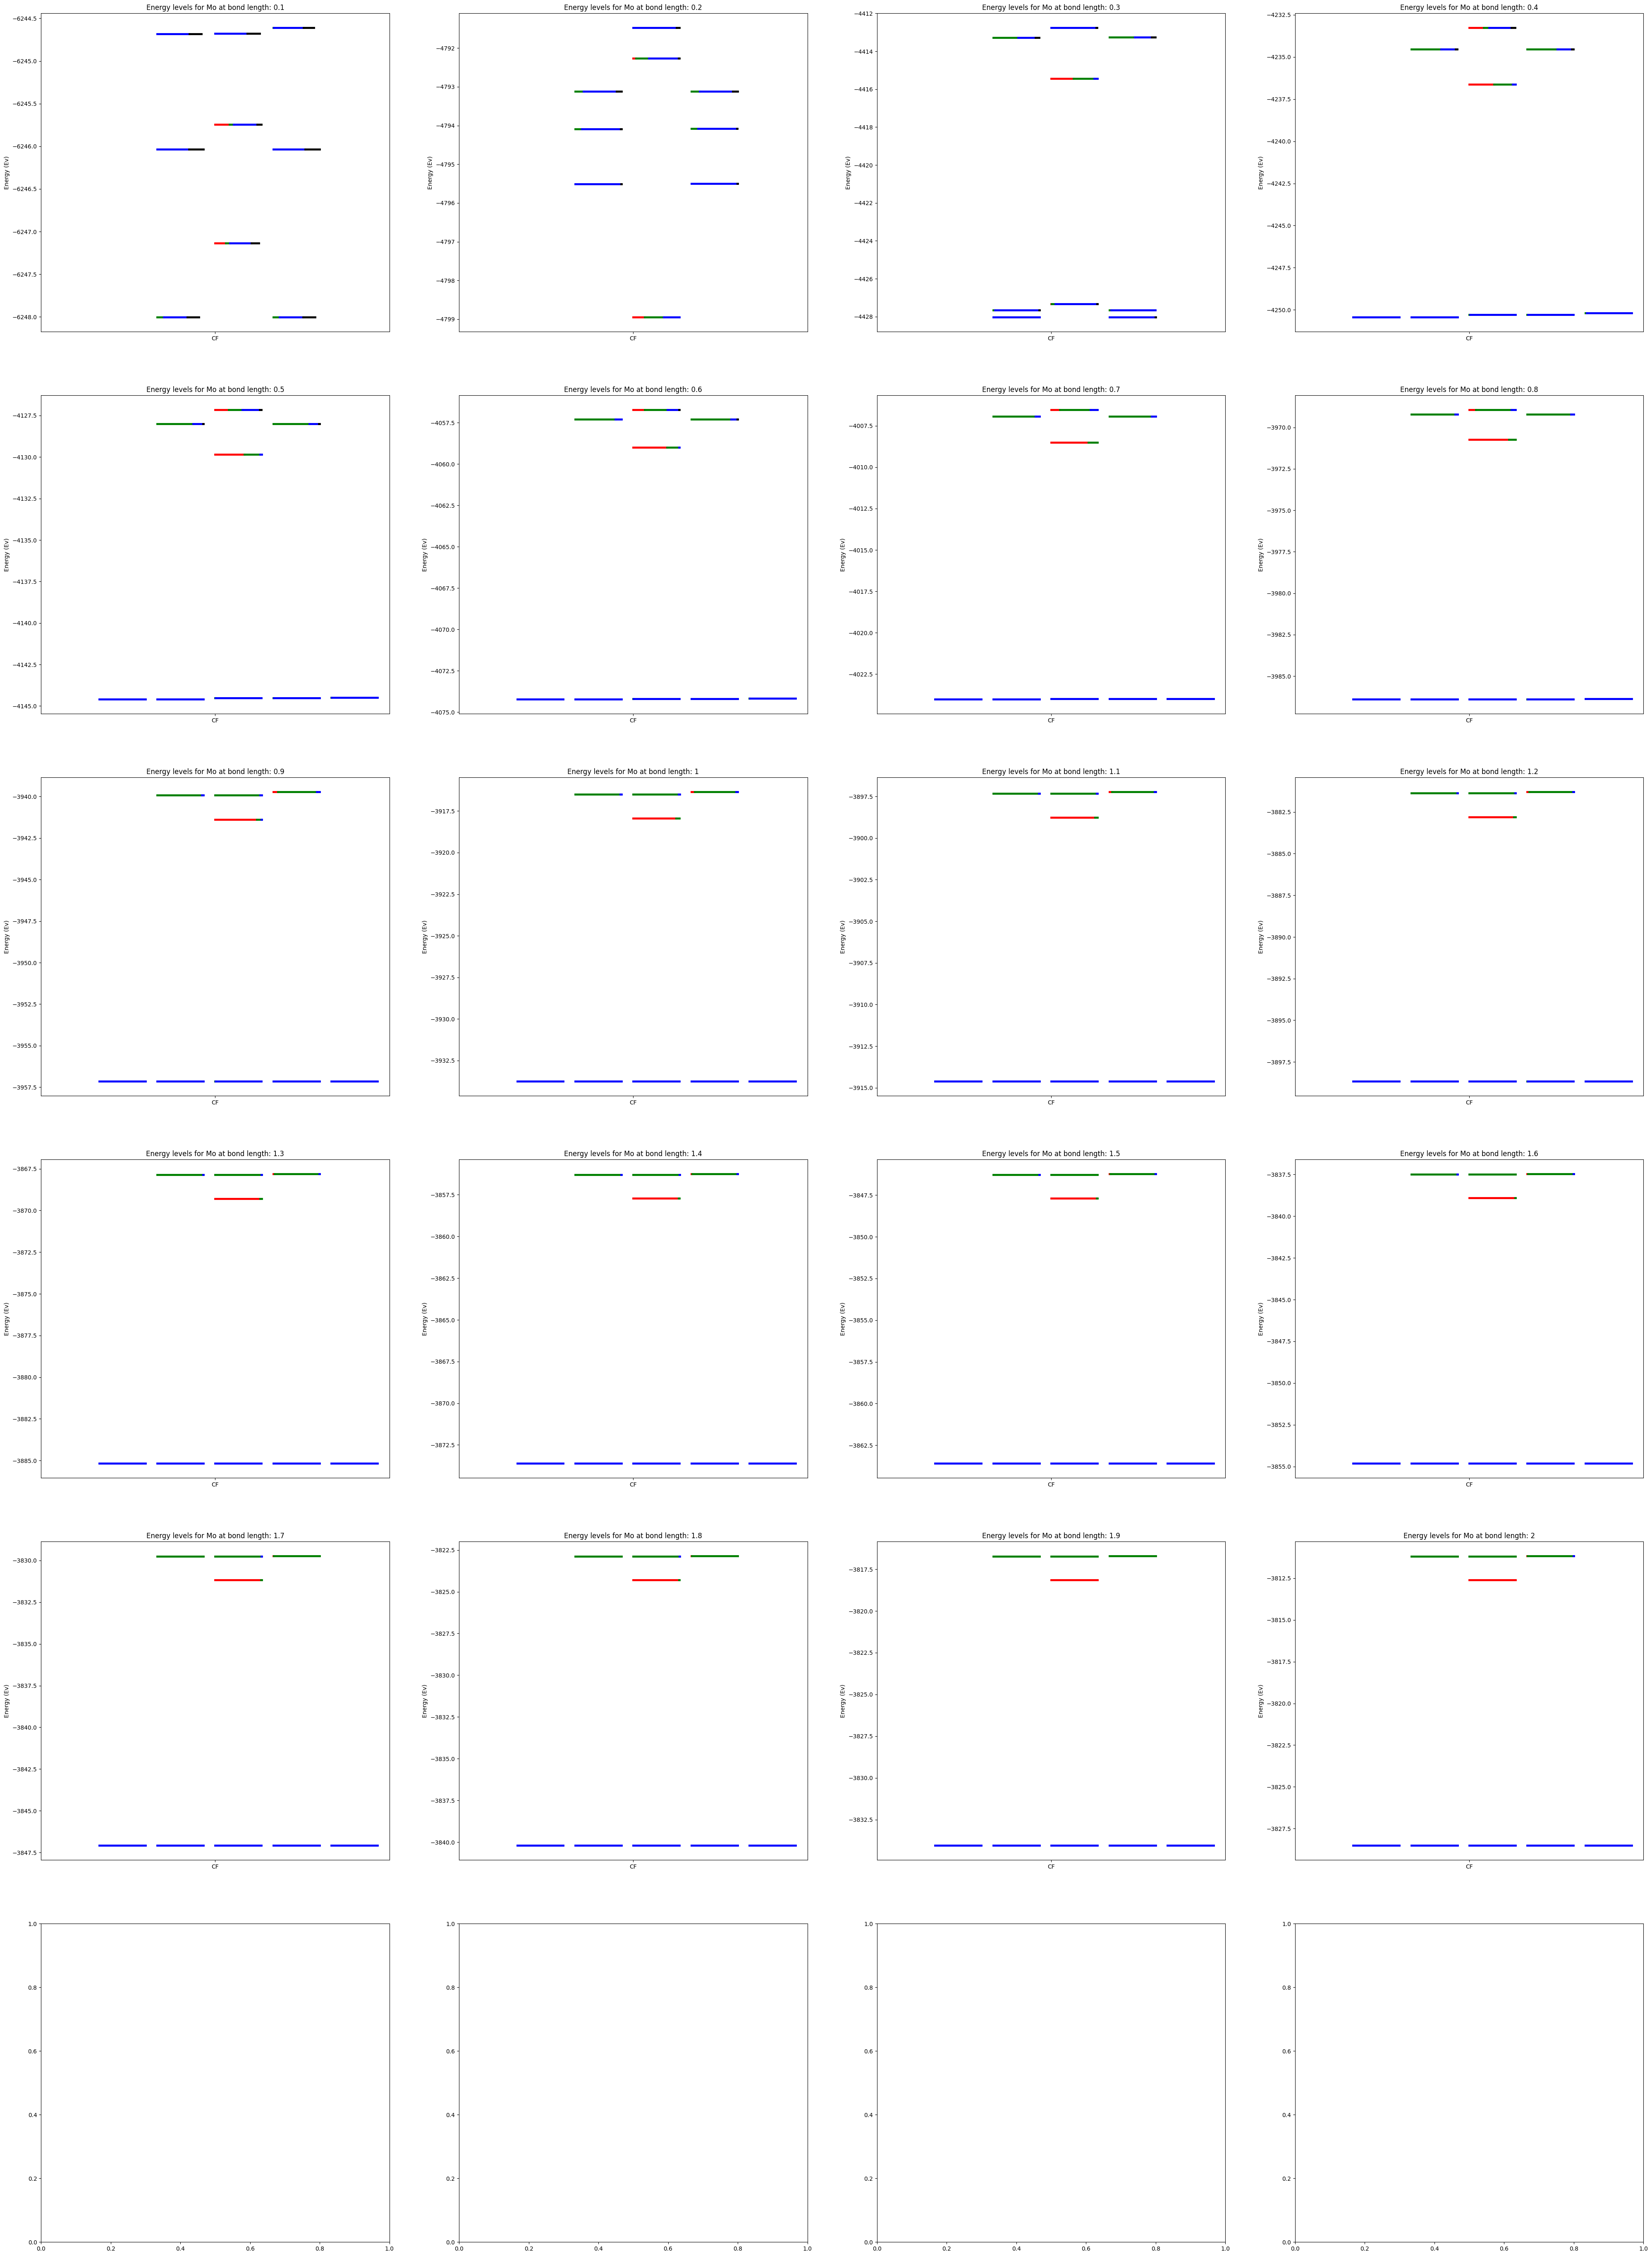

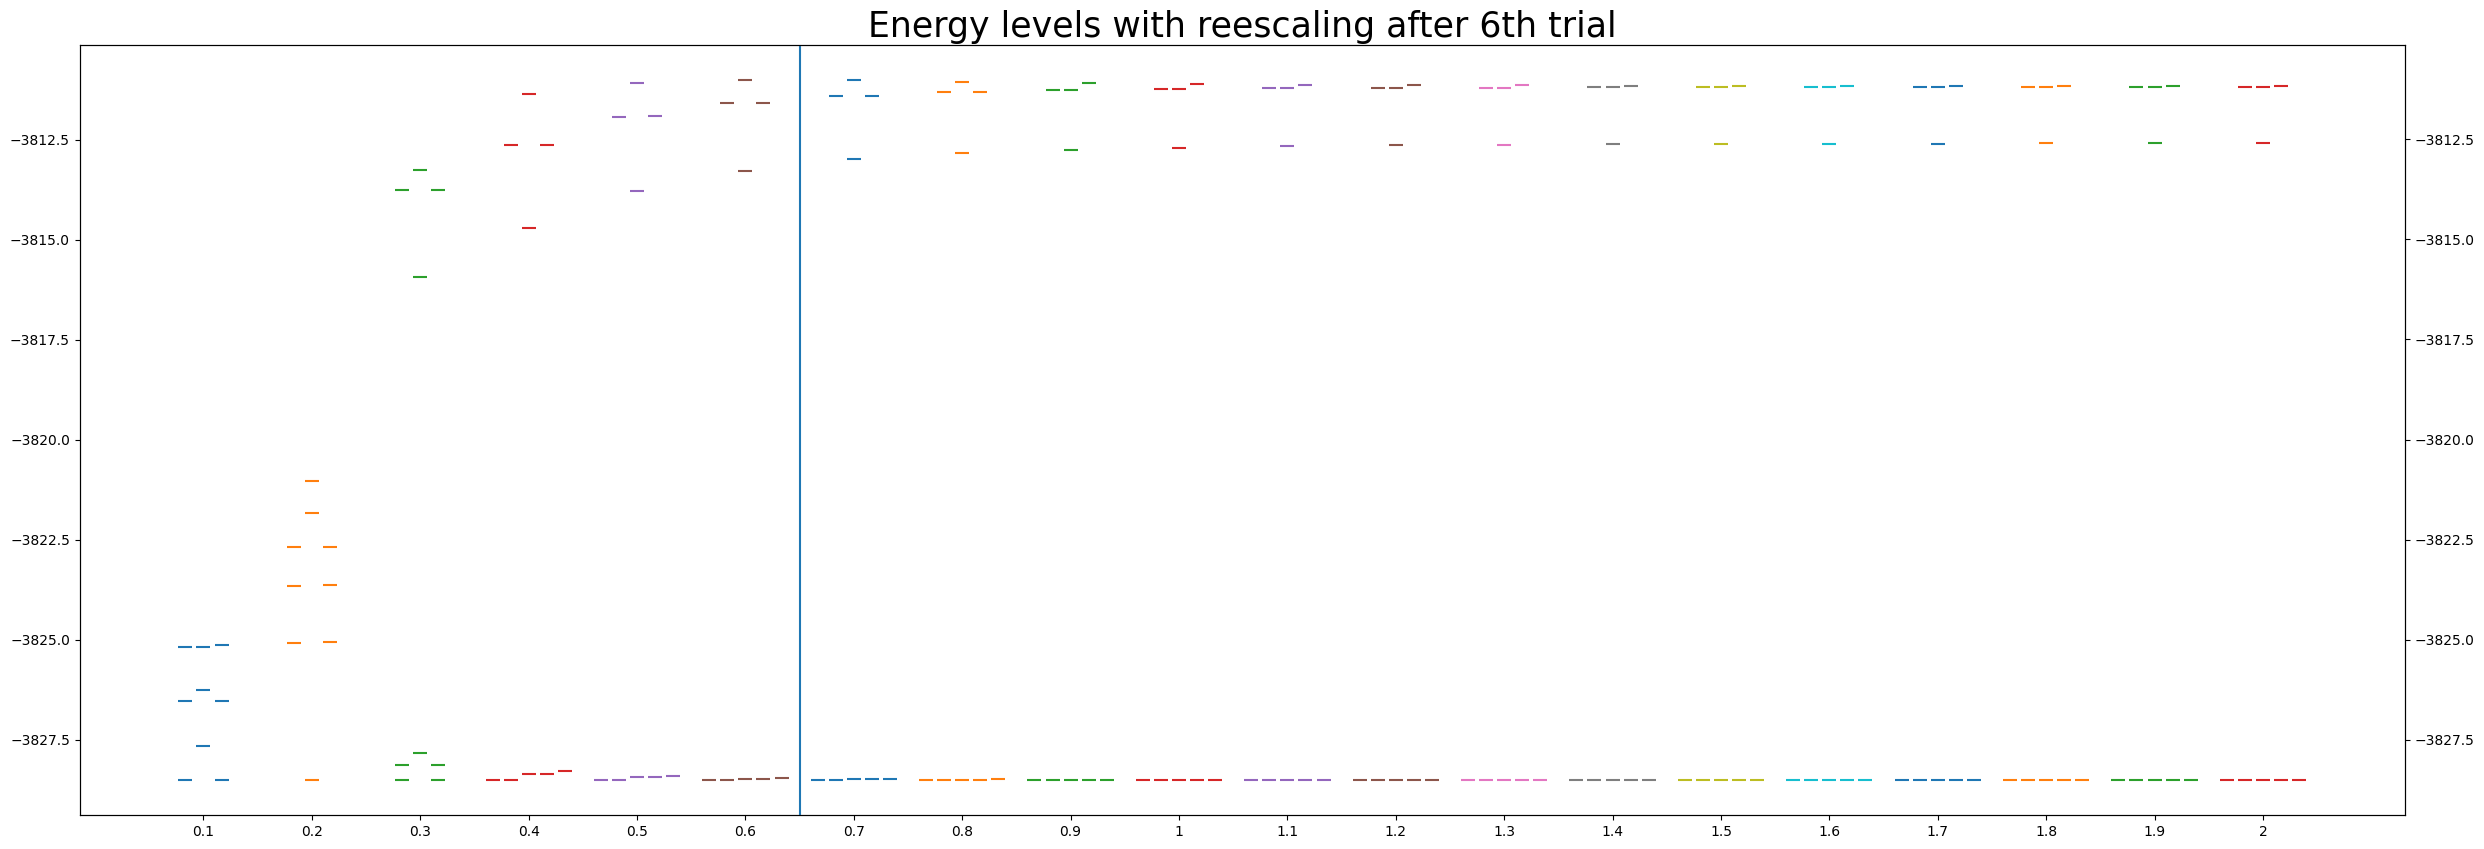

In [272]:
files  = get_files("molybdenum")

Mo_Energies = []
Mo_population_total = []

for i in range(len(files)):
    Mo_Energies.append(rasscf_energies(search_in_file(r'c:\Users\Mikel\Documents\00 - Universidades\2 - RUG_Physics\2024 - 2025\Research Internship\Initial simulations and tryouts\1 electron\non_rel_basis_9_active_Madelung\data_from_sims' + files[i], search_term_rasscf, lines_after_rasscf)))
    Mo_population_total.append(population_summation(search_in_file(r'c:\Users\Mikel\Documents\00 - Universidades\2 - RUG_Physics\2024 - 2025\Research Internship\Initial simulations and tryouts\1 electron\non_rel_basis_9_active_Madelung\data_from_sims' + files[i], search_term_population, lines_after_population)))

Mo_1 = [0.5, 0.5, 0.5, 0, 1, 0, 1, 0, 1]
Mo_2 = [0.5, 0.5, 0, 1, 0.5, 0, 1, 0, 1]
Mo_3 = [0, 1, 0, 1, 0, 1, 0.5, 1, 0]
Mo_4 = [0, 1, 0.5, 0, 1, 0, 1, 0, 1]
Mo_5 = [0, 1, 0.5, 0, 1, 0, 1, 0.5, 0.5]
Mo_6 = [0, 1, 0.5, 0, 1, 0.5, 1, 0, 0.5]
Mo_7 = [0.5, 1, 0, 0.5, 1, 0, 0.5, 0.5, 0.5]
Mo_8 = [0.5, 0, 1, 0.5, 0.5, 0.5, 0, 1, 0.5]
Mo_9 = [0.5, 0.5, 1, 0, 0, 1, 0, 1, 0.5]
Mo_10 = [0.5, 1, 0, 1, 0, 0.5, 0.5, 1, 0]
Mo_11 = [0.5, 0, 1, 0, 1, 0.5, 1, 0, 0.5]
Mo_12 = [-0.5, 0, 0.5, 1, 1.5, 0.5, 1, 0, 0.5]
Mo_13 = [-0.5, 0, 0.5, 1, 1.5,  0.5, 0, 1, 0.5]
Mo_14 = [-0.5, 0, 0.5, 1, 1.5,  0.5, 0, 1, 0.5]
Mo_15 = [-0.5, 0, 0.5, 1, 1.5,  0.5, 0, 1, 0.5]
Mo_16 = [-0.5, 0, 0.5, 1, 1.5,  0.5, 0, 1, 0.5]
Mo_17 = [-0.5, 0, 0.5, 1, 1.5,  0.5, 0, 1, 0.5]
Mo_18 = [-0.5, 0, 0.5, 1, 1.5,  0.5, 0, 1, 0.5]
Mo_19 = [-0.5, 0, 0.5, 1, 1.5,  0.5, 0, 1, 0.5]
Mo_20 = [-0.5, 0, 0.5, 1, 1.5,  0.5, 0, 1, 0.5]
Mo_positions = [Mo_1, Mo_2, Mo_3, Mo_4, Mo_5, Mo_6, Mo_7, Mo_8, Mo_9, Mo_10, Mo_11, Mo_12, Mo_13, Mo_14, Mo_15, Mo_16, Mo_17, Mo_18, Mo_19, Mo_20]


Mo_positions = []
for i in range(len(Mo_Energies)):
    Mo_positions.append(assign_positions_to_energy_values_based_on_their_relative_differences(Mo_Energies[i], threshold=0.2))

plotting_separated_graphs(Mo_positions, Mo_Energies, bond_lengths_factors_list, Mo_population_total, "Mo")
plotting_joint_graphs(Mo_positions, Mo_Energies, bond_lengths_factors_list)

# Tantalum

Red is the s-orbital
Green is the p-orbital
Blue is the d-orbital
Black is the f-orbital


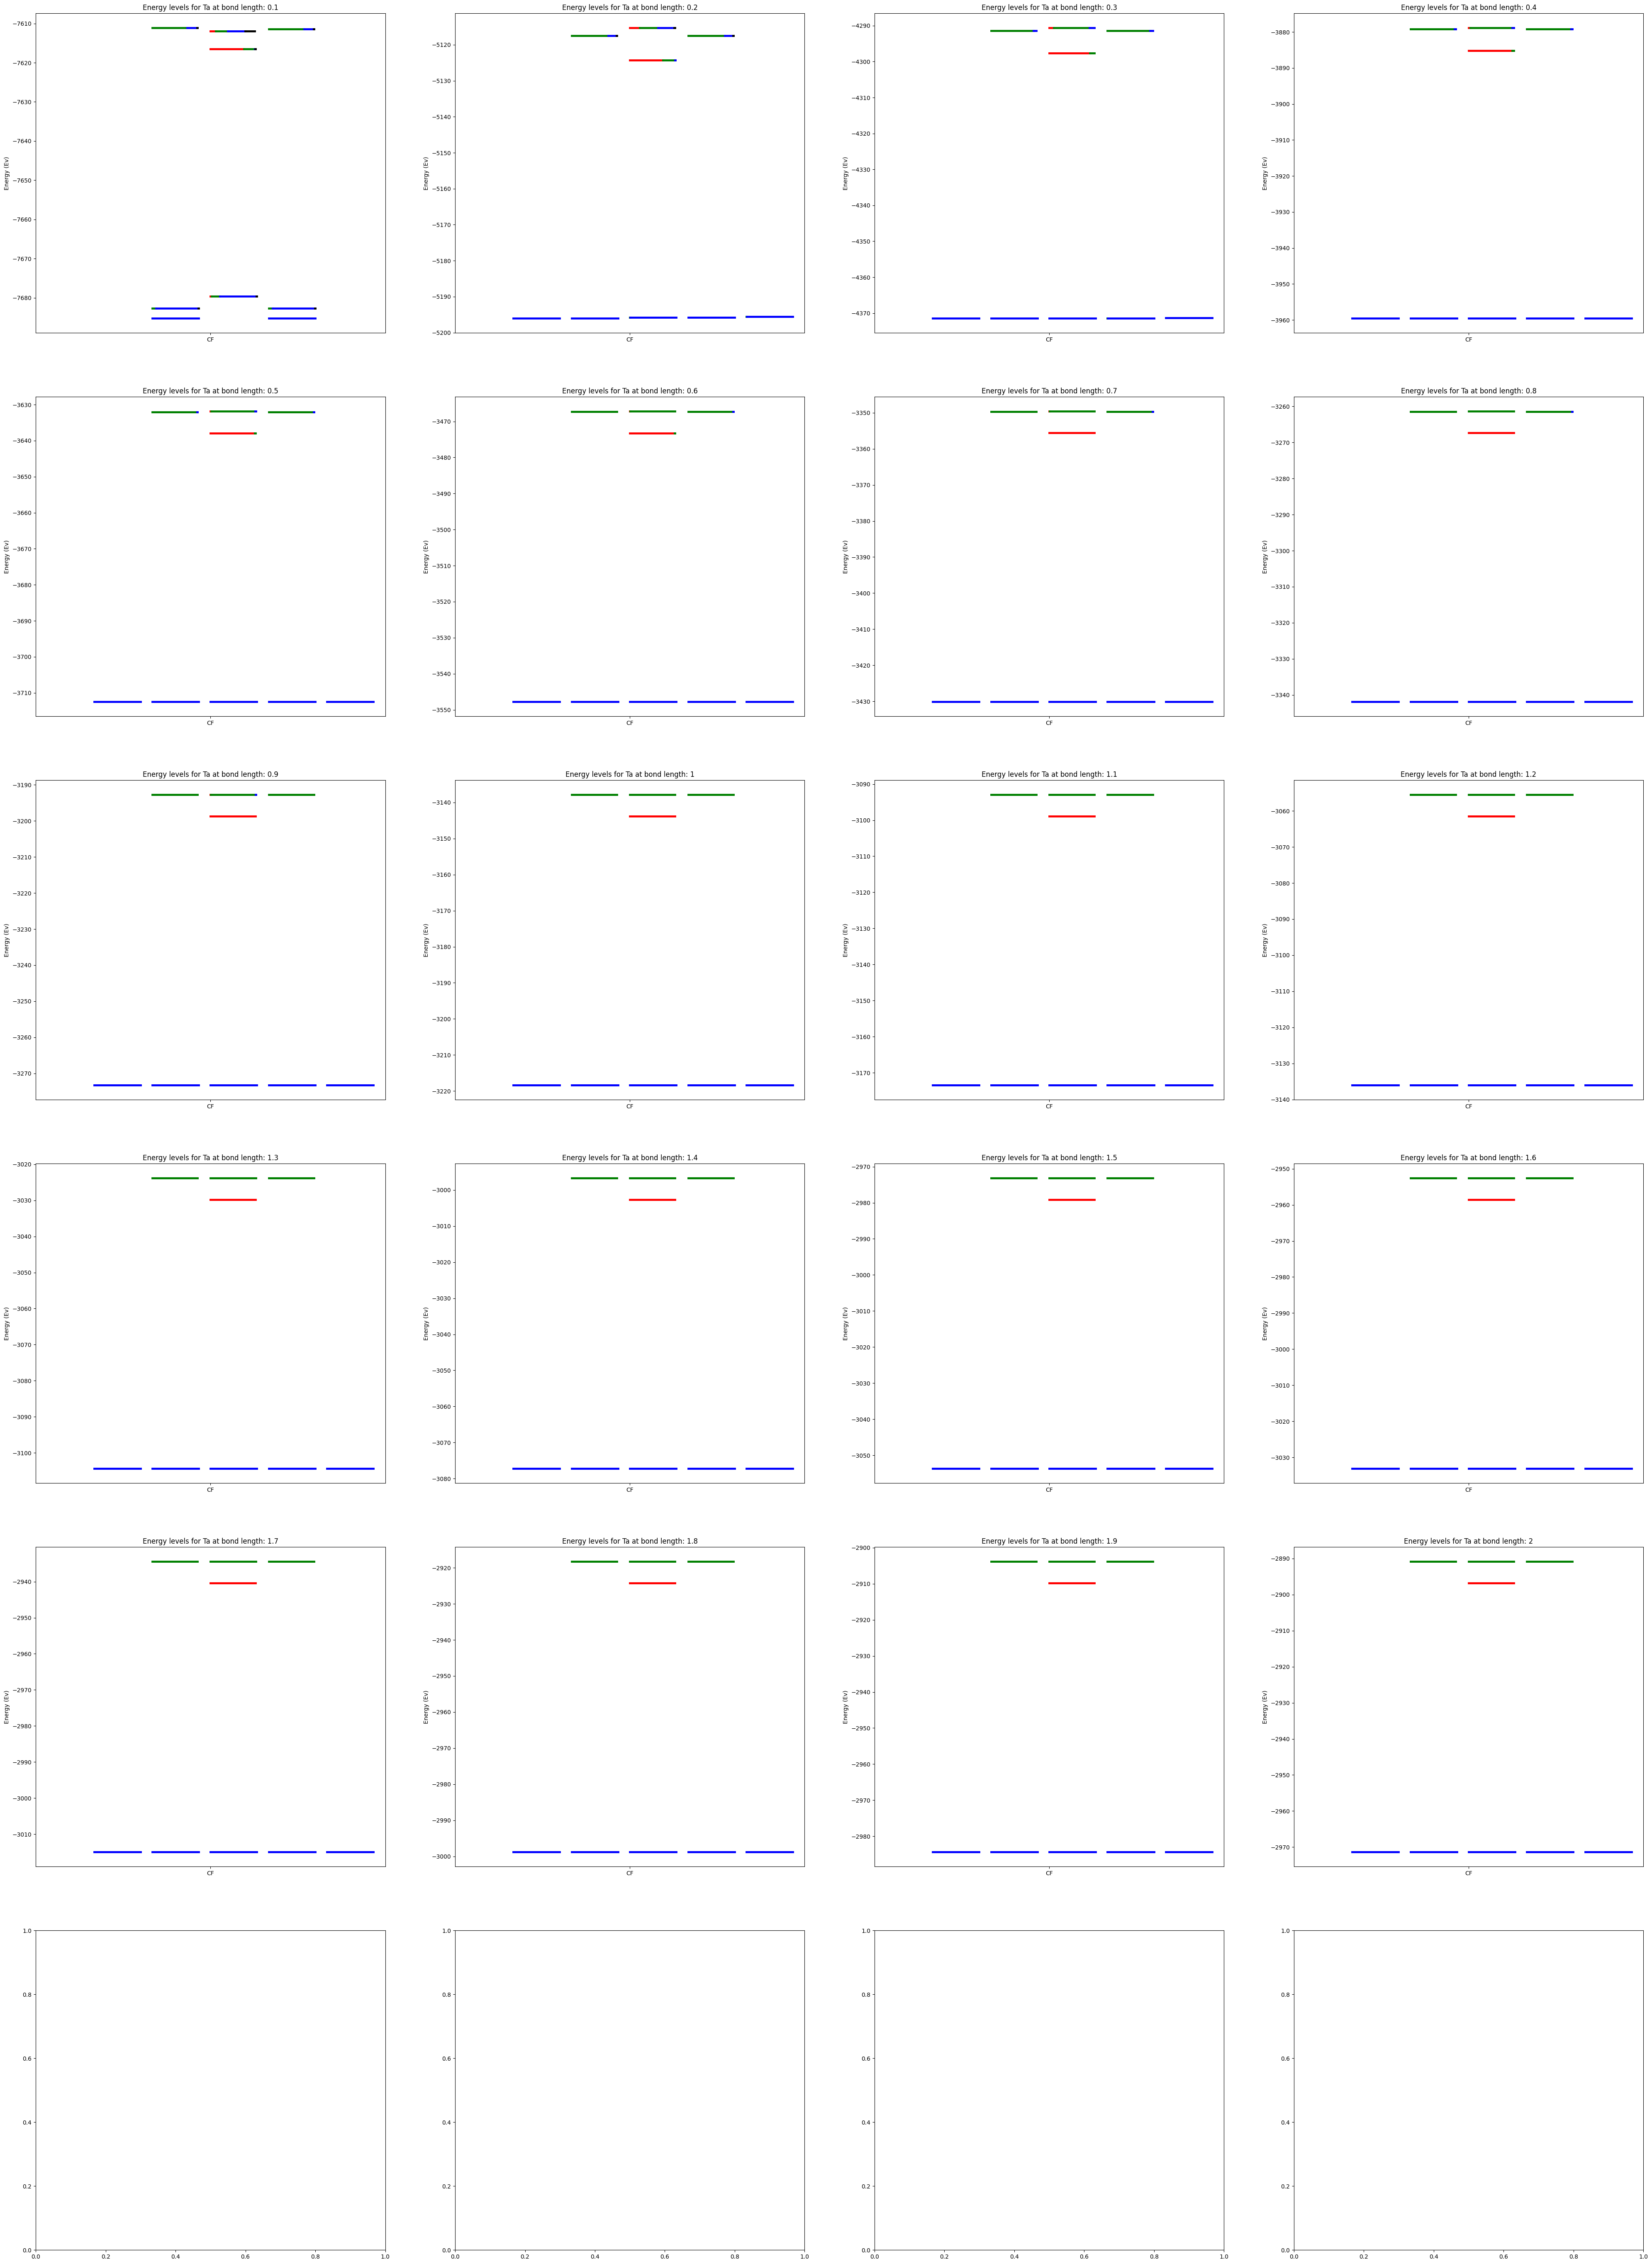

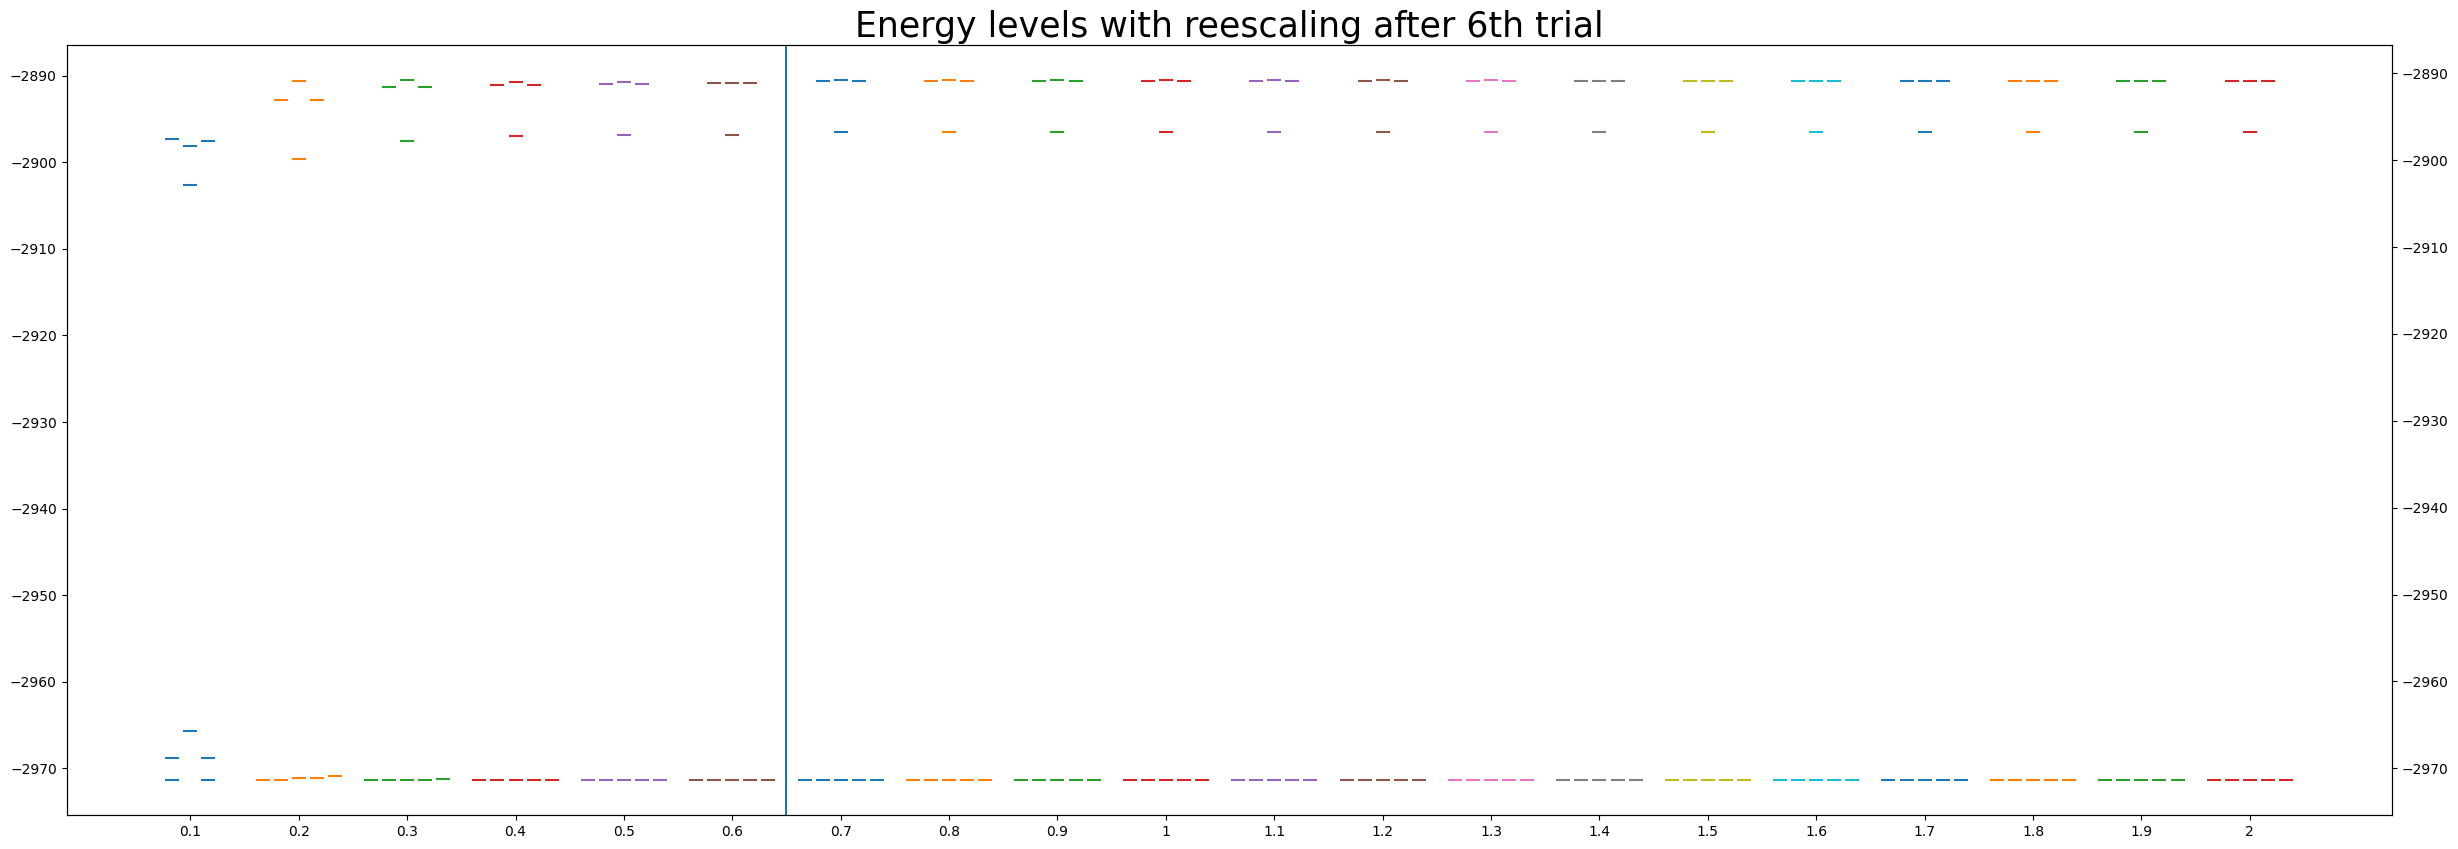

In [282]:
files  = get_files("tantalum")

Ta_Energies = []
Ta_population_total = []

for i in range(len(files)):
    Ta_Energies.append(rasscf_energies(search_in_file(r'c:\Users\Mikel\Documents\00 - Universidades\2 - RUG_Physics\2024 - 2025\Research Internship\Initial simulations and tryouts\1 electron\non_rel_basis_9_active_Madelung\data_from_sims' + files[i], search_term_rasscf, lines_after_rasscf)))
    Ta_population_total.append(population_summation(search_in_file(r'c:\Users\Mikel\Documents\00 - Universidades\2 - RUG_Physics\2024 - 2025\Research Internship\Initial simulations and tryouts\1 electron\non_rel_basis_9_active_Madelung\data_from_sims' + files[i], search_term_population, lines_after_population)))

Ta_1 = [0, 1, 0, 1, 0.5, 0.5, 0.5, 1, 0]
Ta_2 = [-0.5, 0, 0.5, 1, 1.5,  0.5, 0, 1, 0.5]
Ta_3 = [-0.5, 0, 0.5, 1, 1.5,  0.5, 0, 1, 0.5]
Ta_4 = [-0.5, 0, 0.5, 1, 1.5,  0.5, 0, 1, 0.5]
Ta_5 = [-0.5, 0, 0.5, 1, 1.5,  0.5, 0, 1, 0.5]
Ta_6 = [-0.5, 0, 0.5, 1, 1.5,  0.5, 0, 1, 0.5]
Ta_7 = [-0.5, 0, 0.5, 1, 1.5,  0.5, 0, 1, 0.5]
Ta_8 = [-0.5, 0, 0.5, 1, 1.5,  0.5, 0, 1, 0.5]
Ta_9 = [-0.5, 0, 0.5, 1, 1.5,  0.5, 0, 1, 0.5]
Ta_10 = [-0.5, 0, 0.5, 1, 1.5,  0.5, 0, 1, 0.5]
Ta_11 = [-0.5, 0, 0.5, 1, 1.5,  0.5, 0, 1, 0.5]
Ta_12 = [-0.5, 0, 0.5, 1, 1.5,  0.5, 0, 1, 0.5]
Ta_13 = [-0.5, 0, 0.5, 1, 1.5,  0.5, 0, 1, 0.5]
Ta_14 = [-0.5, 0, 0.5, 1, 1.5,  0.5, 0, 1, 0.5]
Ta_15 = [-0.5, 0, 0.5, 1, 1.5,  0.5, 0, 1, 0.5]
Ta_16 = [-0.5, 0, 0.5, 1, 1.5,  0.5, 0, 1, 0.5]
Ta_17 = [-0.5, 0, 0.5, 1, 1.5,  0.5, 0, 1, 0.5]
Ta_18 = [-0.5, 0, 0.5, 1, 1.5,  0.5, 0, 1, 0.5]
Ta_19 = [-0.5, 0, 0.5, 1, 1.5,  0.5, 0, 1, 0.5]
Ta_20 = [-0.5, 0, 0.5, 1, 1.5,  0.5, 0, 1, 0.5]
Ta_positions = [Ta_1, Ta_2, Ta_3, Ta_4, Ta_5, Ta_6, Ta_7, Ta_8, Ta_9, Ta_10, Ta_11, Ta_12, Ta_13, Ta_14, Ta_15, Ta_16, Ta_17, Ta_18, Ta_19, Ta_20]


#Ta_positions = []
#for i in range(len(Ta_Energies)):
#    Ta_positions.append(assign_positions_to_energy_values_based_on_their_relative_differences(Ta_Energies[i], threshold=0.07))

plotting_separated_graphs(Ta_positions, Ta_Energies, bond_lengths_factors_list, Ta_population_total, "Ta")
plotting_joint_graphs(Ta_positions, Ta_Energies, bond_lengths_factors_list)

# Tungsten

Red is the s-orbital
Green is the p-orbital
Blue is the d-orbital
Black is the f-orbital


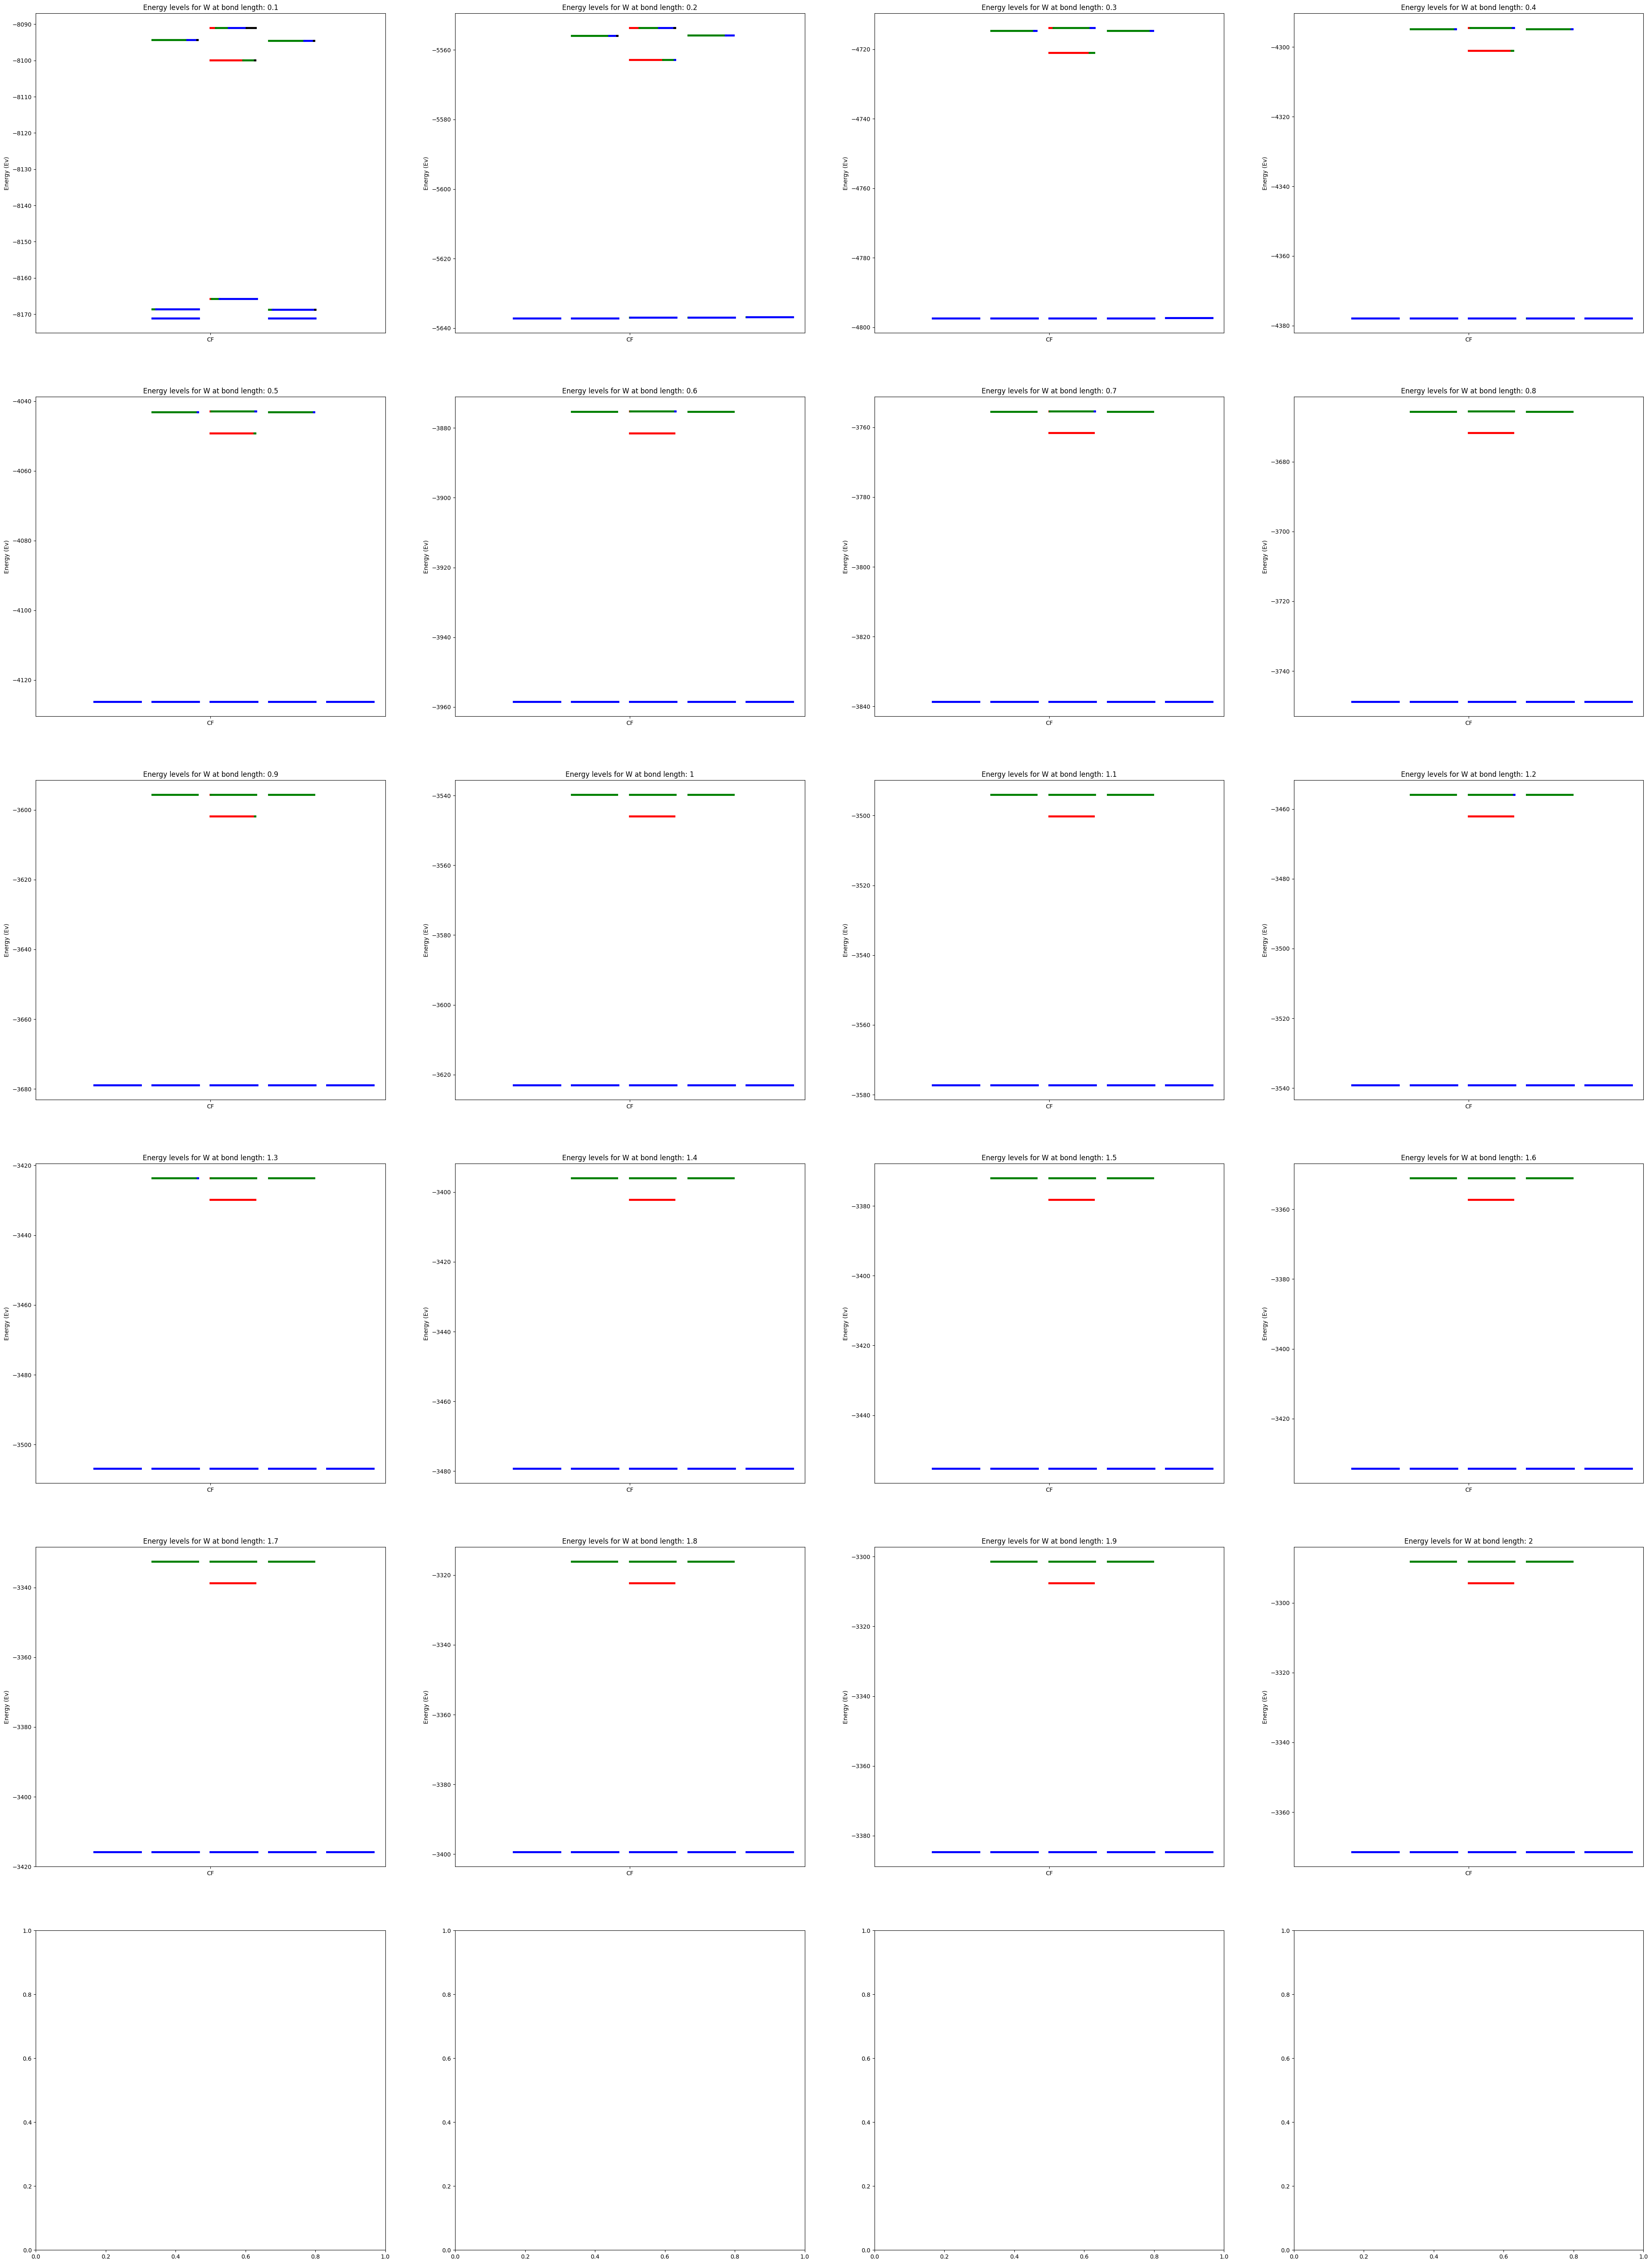

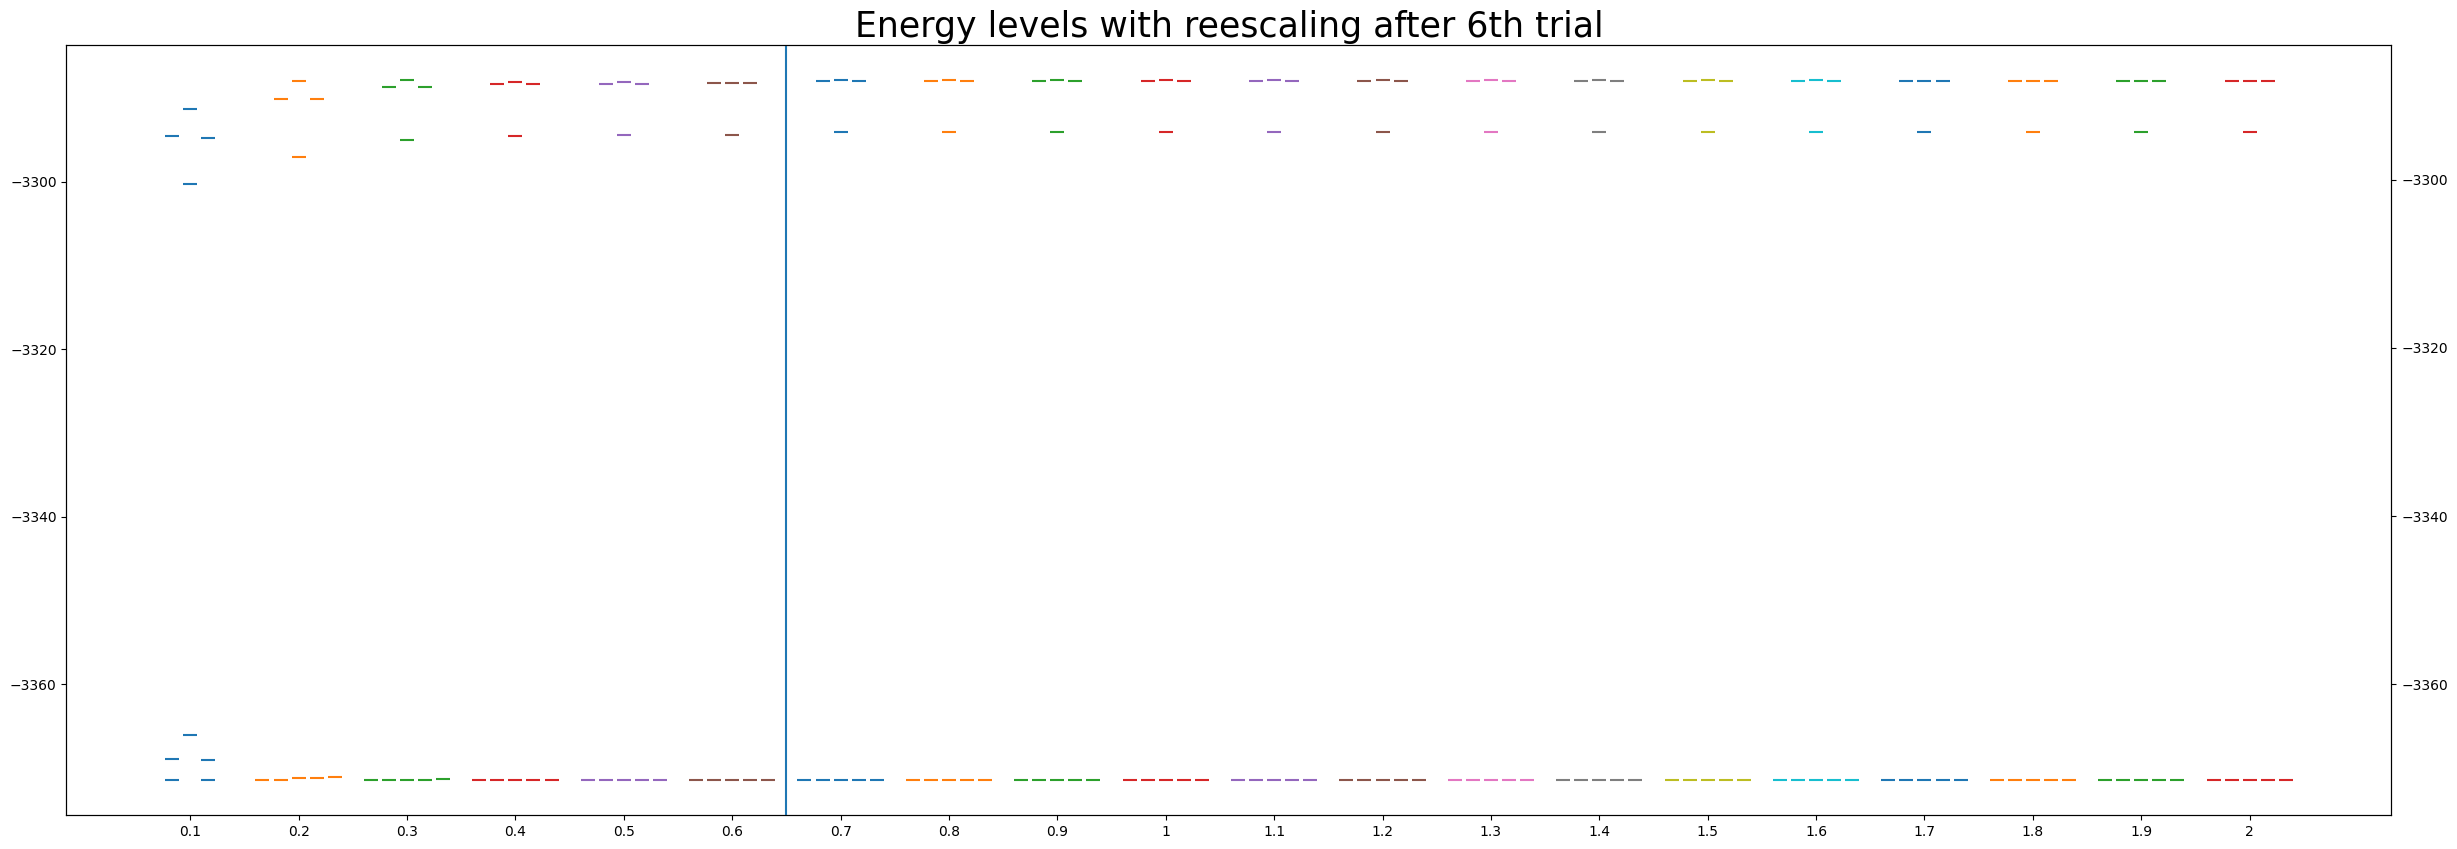

In [289]:
files  = get_files("tungsten")

W_Energies = []
W_population_total = []

for i in range(len(files)):
    W_Energies.append(rasscf_energies(search_in_file(r'c:\Users\Mikel\Documents\00 - Universidades\2 - RUG_Physics\2024 - 2025\Research Internship\Initial simulations and tryouts\1 electron\non_rel_basis_9_active_Madelung\data_from_sims' + files[i], search_term_rasscf, lines_after_rasscf)))
    W_population_total.append(population_summation(search_in_file(r'c:\Users\Mikel\Documents\00 - Universidades\2 - RUG_Physics\2024 - 2025\Research Internship\Initial simulations and tryouts\1 electron\non_rel_basis_9_active_Madelung\data_from_sims' + files[i], search_term_population, lines_after_population)))

W_1 = [1, 0, 1, 0, 0.5, 0.5, 1, 0, 0.5]
W_2 = [-0.5, 0, 0.5, 1, 1.5,  0.5, 0, 1, 0.5]
W_3 = [-0.5, 0, 0.5, 1, 1.5,  0.5, 0, 1, 0.5]
W_4 = [-0.5, 0, 0.5, 1, 1.5,  0.5, 0, 1, 0.5]
W_5 = [-0.5, 0, 0.5, 1, 1.5,  0.5, 0, 1, 0.5]
W_6 = [-0.5, 0, 0.5, 1, 1.5,  0.5, 0, 1, 0.5]
W_7 = [-0.5, 0, 0.5, 1, 1.5,  0.5, 0, 1, 0.5]
W_8 = [-0.5, 0, 0.5, 1, 1.5,  0.5, 0, 1, 0.5]
W_9 = [-0.5, 0, 0.5, 1, 1.5,  0.5, 0, 1, 0.5]
W_10 = [-0.5, 0, 0.5, 1, 1.5,  0.5, 0, 1, 0.5]
W_11 = [-0.5, 0, 0.5, 1, 1.5,  0.5, 0, 1, 0.5]
W_12 = [-0.5, 0, 0.5, 1, 1.5,  0.5, 0, 1, 0.5]
W_13 = [-0.5, 0, 0.5, 1, 1.5,  0.5, 0, 1, 0.5]
W_14 = [-0.5, 0, 0.5, 1, 1.5,  0.5, 0, 1, 0.5]
W_15 = [-0.5, 0, 0.5, 1, 1.5,  0.5, 0, 1, 0.5]
W_16 = [-0.5, 0, 0.5, 1, 1.5,  0.5, 0, 1, 0.5]
W_17 = [-0.5, 0, 0.5, 1, 1.5,  0.5, 0, 1, 0.5]
W_18 = [-0.5, 0, 0.5, 1, 1.5,  0.5, 0, 1, 0.5]
W_19 = [-0.5, 0, 0.5, 1, 1.5,  0.5, 0, 1, 0.5]
W_20 = [-0.5, 0, 0.5, 1, 1.5,  0.5, 0, 1, 0.5]
W_positions = [W_1, W_2, W_3, W_4, W_5, W_6, W_7, W_8, W_9, W_10, W_11, W_12, W_13, W_14, W_15, W_16, W_17, W_18, W_19, W_20]


#W_positions = []
#for i in range(len(W_Energies)):
#    W_positions.append(assign_positions_to_energy_values_based_on_their_relative_differences(W_Energies[i], threshold=0.01))

plotting_separated_graphs(W_positions, W_Energies, bond_lengths_factors_list, W_population_total, "W")
plotting_joint_graphs(W_positions, W_Energies, bond_lengths_factors_list)

# Rhenium

Red is the s-orbital
Green is the p-orbital
Blue is the d-orbital
Black is the f-orbital


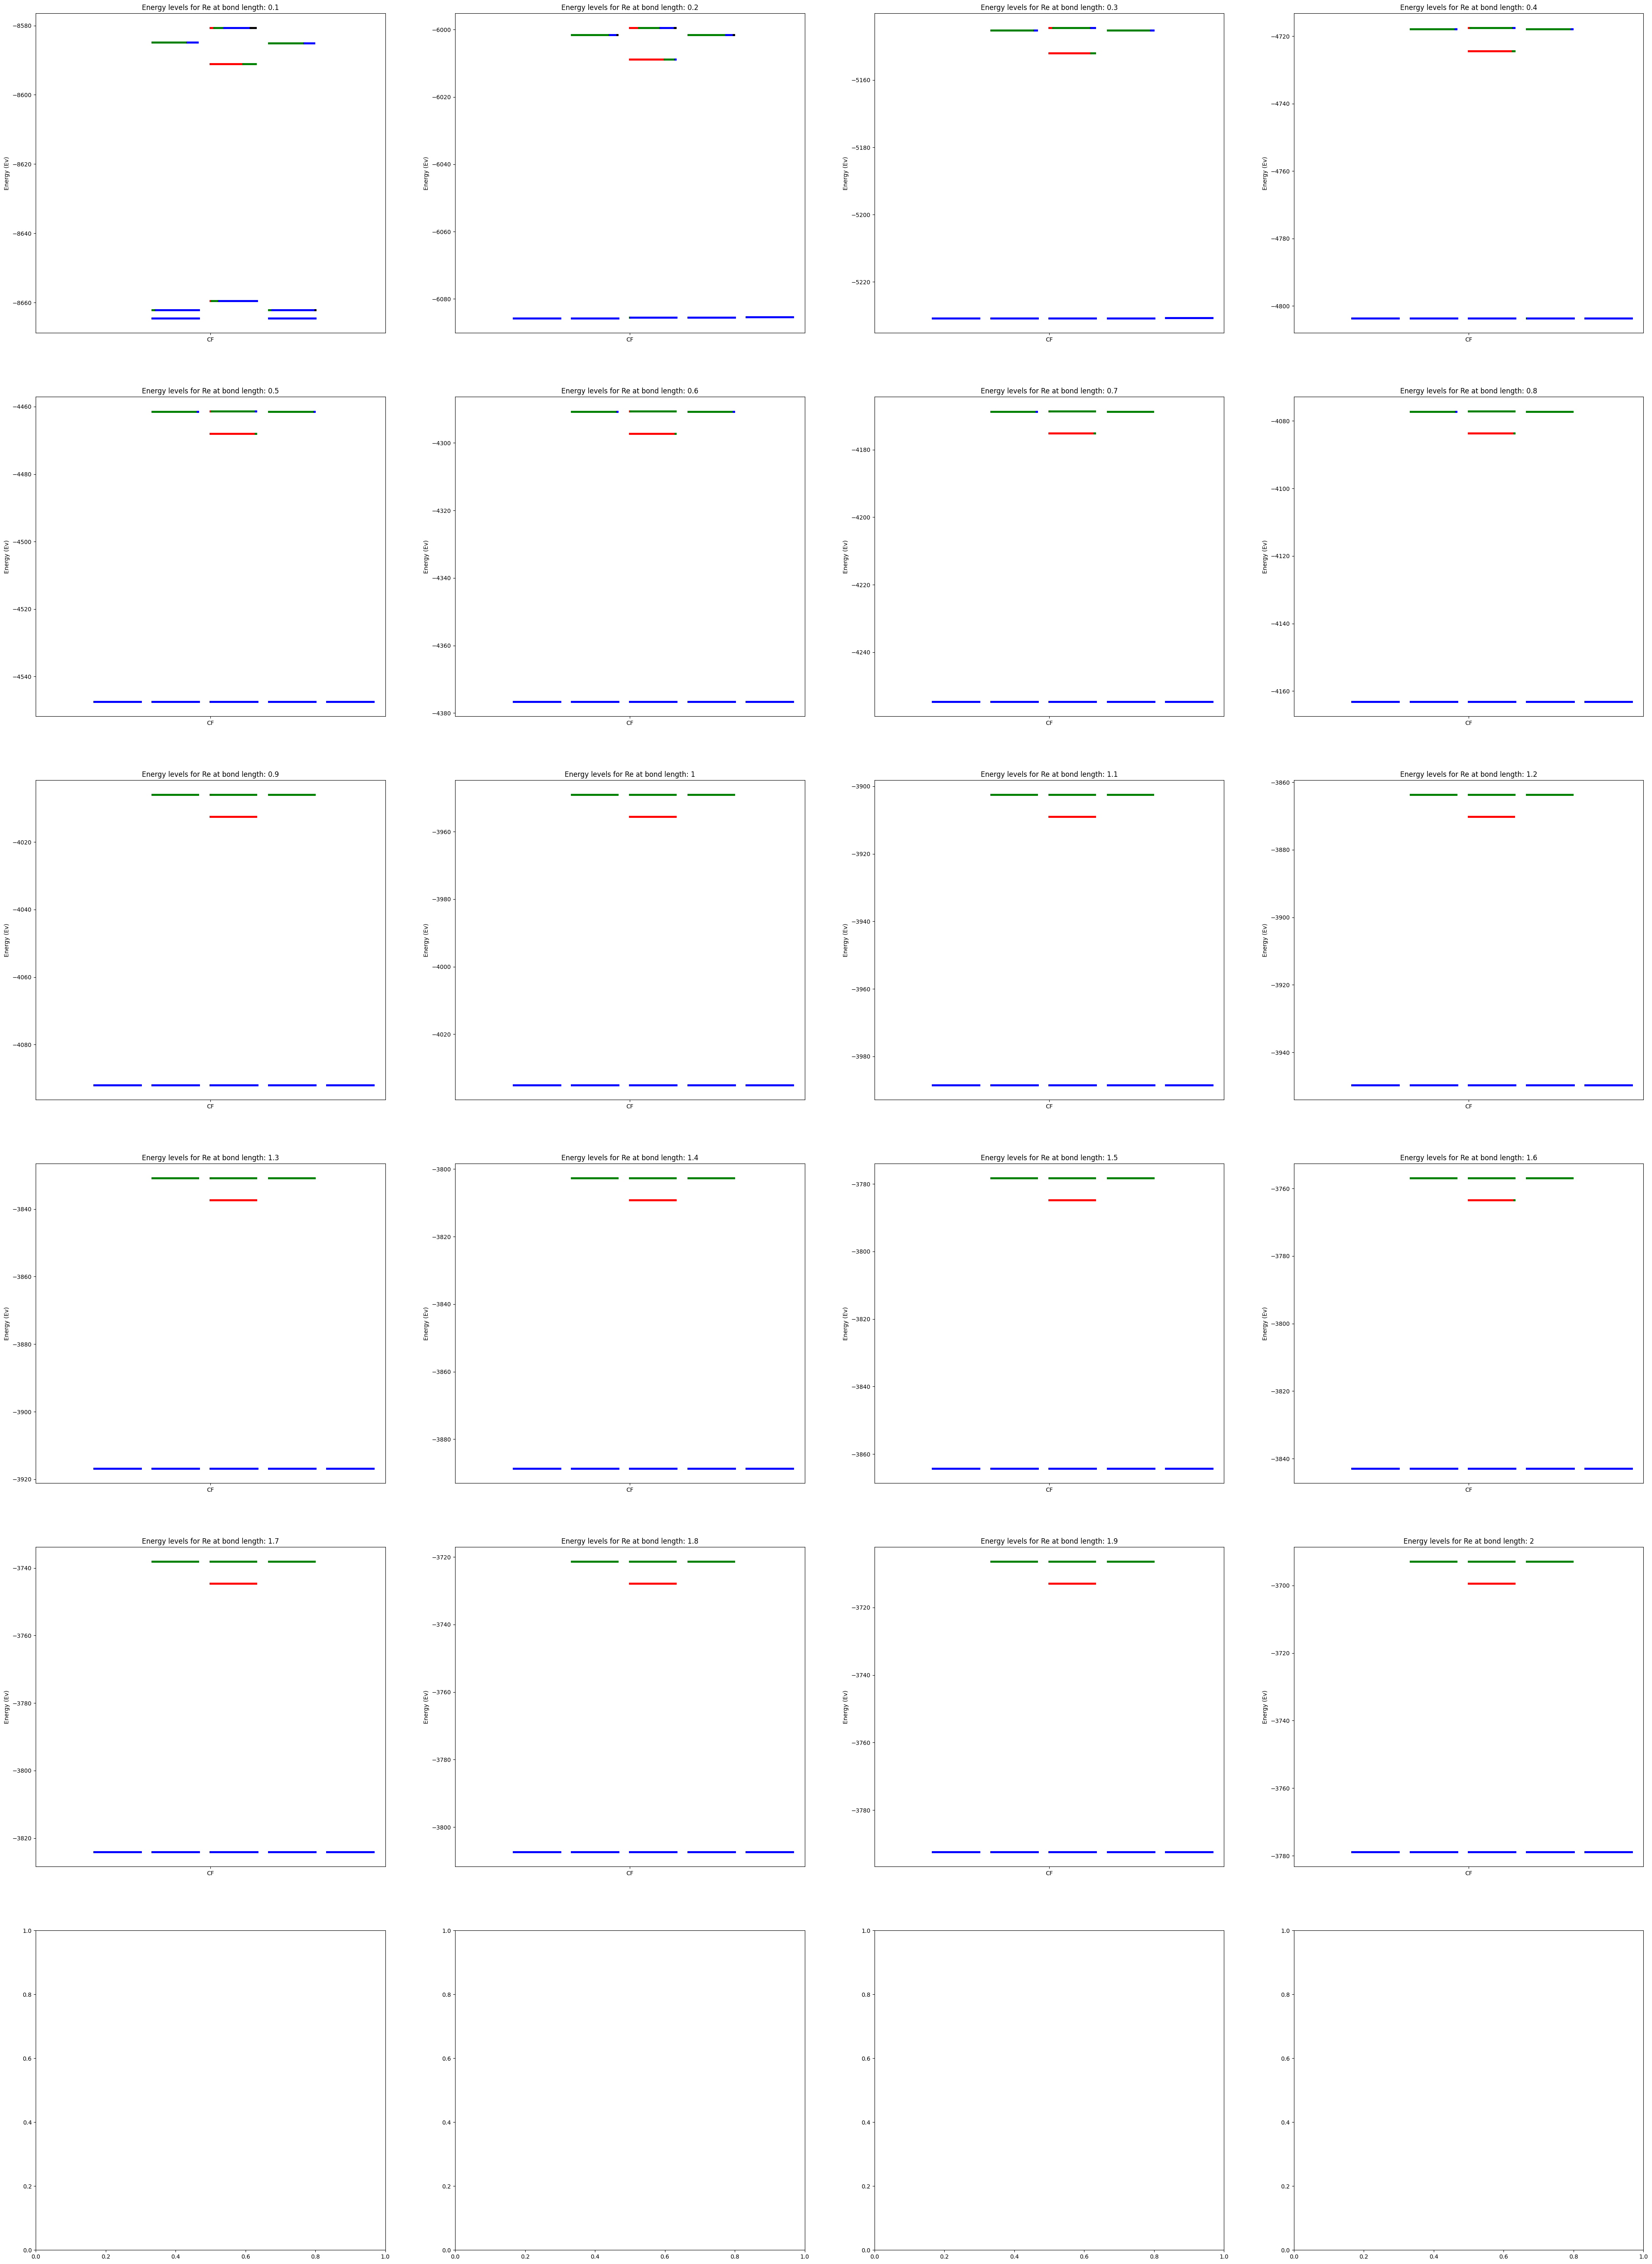

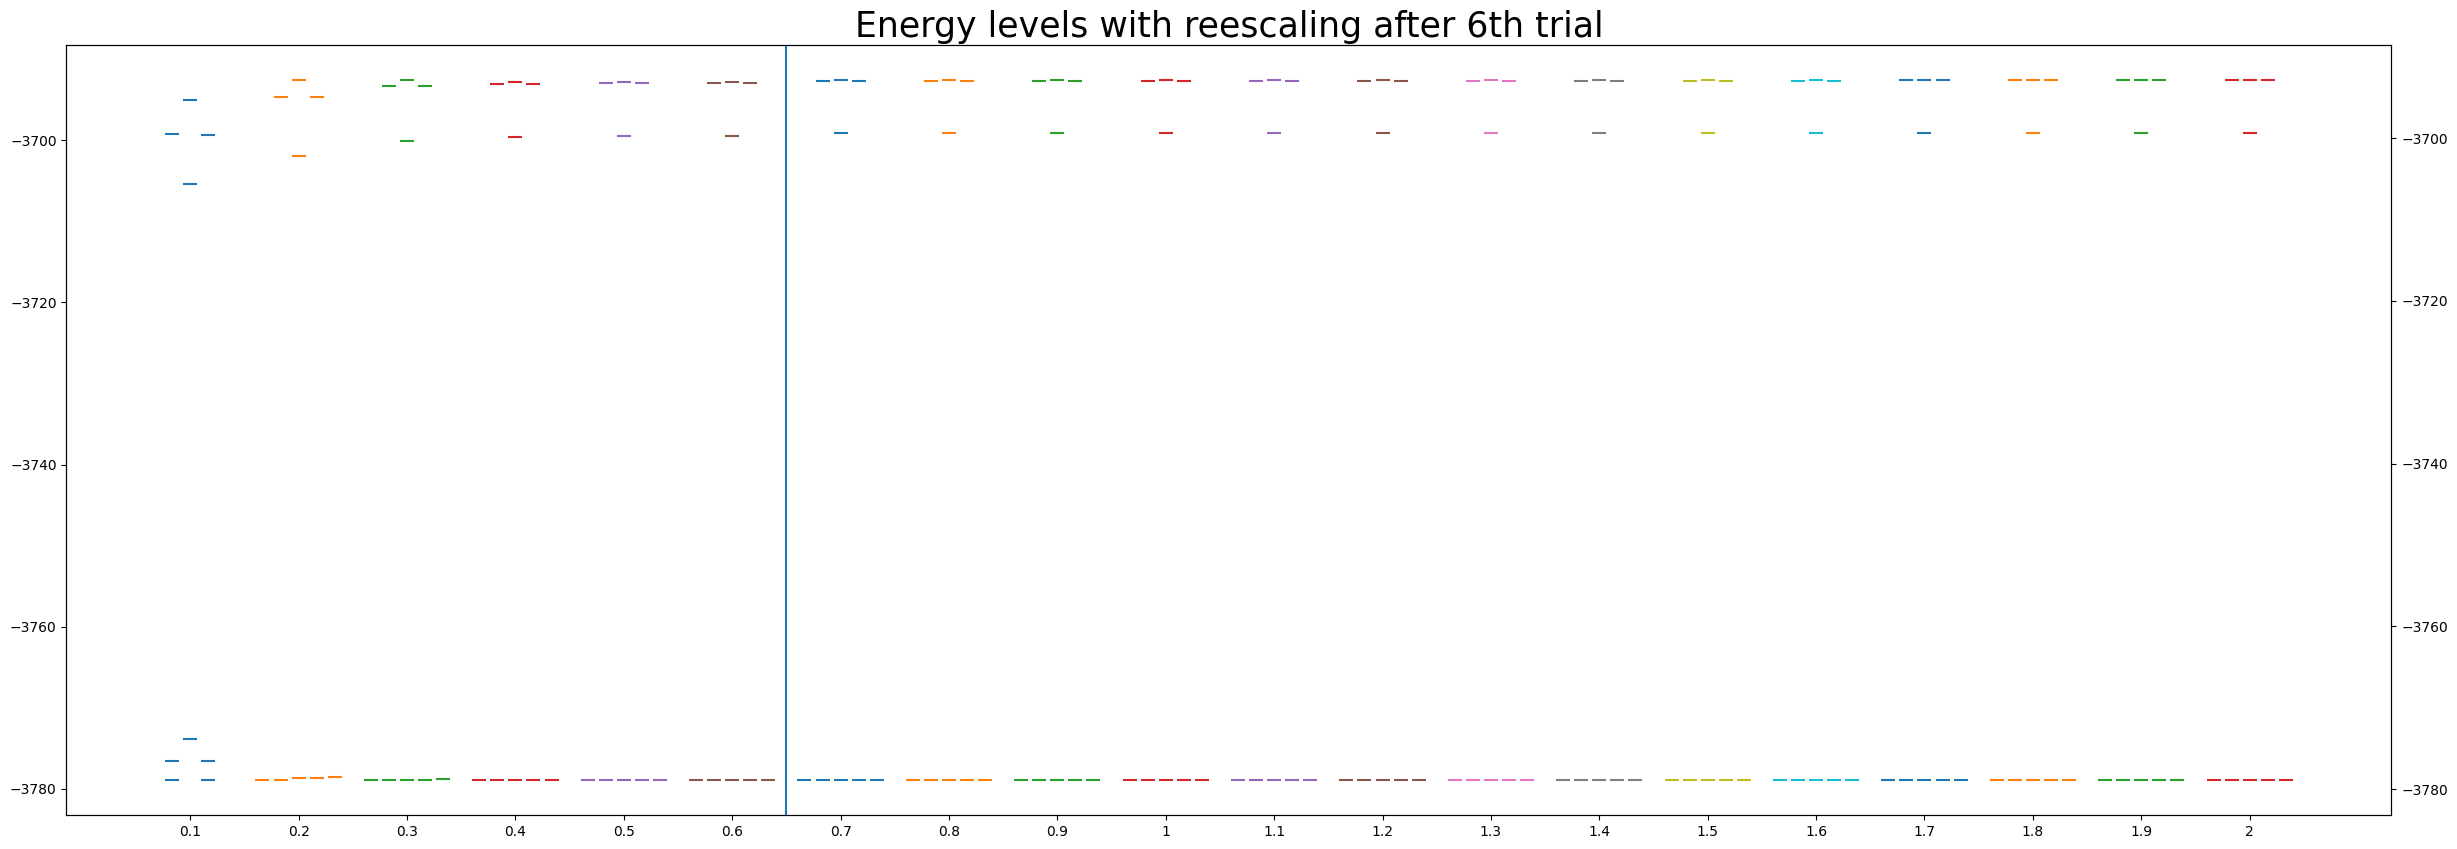

In [293]:
files  = get_files("rhenium")

Re_Energies = []
Re_population_total = []

for i in range(len(files)):
    Re_Energies.append(rasscf_energies(search_in_file(r'c:\Users\Mikel\Documents\00 - Universidades\2 - RUG_Physics\2024 - 2025\Research Internship\Initial simulations and tryouts\1 electron\non_rel_basis_9_active_Madelung\data_from_sims' + files[i], search_term_rasscf, lines_after_rasscf)))
    Re_population_total.append(population_summation(search_in_file(r'c:\Users\Mikel\Documents\00 - Universidades\2 - RUG_Physics\2024 - 2025\Research Internship\Initial simulations and tryouts\1 electron\non_rel_basis_9_active_Madelung\data_from_sims' + files[i], search_term_population, lines_after_population)))

Re_1 = [0, 1, 1, 0, 0.5, 0.5, 1, 0, 0.5]
Re_2 = [-0.5, 0, 0.5, 1, 1.5,  0.5, 0, 1, 0.5]
Re_3 = [-0.5, 0, 0.5, 1, 1.5,  0.5, 0, 1, 0.5]
Re_4 = [-0.5, 0, 0.5, 1, 1.5,  0.5, 0, 1, 0.5]
Re_5 = [-0.5, 0, 0.5, 1, 1.5,  0.5, 0, 1, 0.5]
Re_6 = [-0.5, 0, 0.5, 1, 1.5,  0.5, 0, 1, 0.5]
Re_7 = [-0.5, 0, 0.5, 1, 1.5,  0.5, 0, 1, 0.5]
Re_8 = [-0.5, 0, 0.5, 1, 1.5,  0.5, 0, 1, 0.5]
Re_9 = [-0.5, 0, 0.5, 1, 1.5,  0.5, 0, 1, 0.5]
Re_10 = [-0.5, 0, 0.5, 1, 1.5,  0.5, 0, 1, 0.5]
Re_11 = [-0.5, 0, 0.5, 1, 1.5,  0.5, 0, 1, 0.5]
Re_12 = [-0.5, 0, 0.5, 1, 1.5,  0.5, 0, 1, 0.5]
Re_13 = [-0.5, 0, 0.5, 1, 1.5,  0.5, 0, 1, 0.5]
Re_14 = [-0.5, 0, 0.5, 1, 1.5,  0.5, 0, 1, 0.5]
Re_15 = [-0.5, 0, 0.5, 1, 1.5,  0.5, 0, 1, 0.5]
Re_16 = [-0.5, 0, 0.5, 1, 1.5,  0.5, 0, 1, 0.5]
Re_17 = [-0.5, 0, 0.5, 1, 1.5,  0.5, 0, 1, 0.5]
Re_18 = [-0.5, 0, 0.5, 1, 1.5,  0.5, 0, 1, 0.5]
Re_19 = [-0.5, 0, 0.5, 1, 1.5,  0.5, 0, 1, 0.5]
Re_20 = [-0.5, 0, 0.5, 1, 1.5,  0.5, 0, 1, 0.5]
Re_positions = [Re_1, Re_2, Re_3, Re_4, Re_5, Re_6, Re_7, Re_8, Re_9, Re_10, Re_11, Re_12, Re_13, Re_14, Re_15, Re_16, Re_17, Re_18, Re_19, Re_20]


#Re_positions = []
#for i in range(len(Re_Energies)):
#    Re_positions.append(assign_positions_to_energy_values_based_on_their_relative_differences(Re_Energies[i], threshold=0.01))

plotting_separated_graphs(Re_positions, Re_Energies, bond_lengths_factors_list, Re_population_total, "Re")
plotting_joint_graphs(Re_positions, Re_Energies, bond_lengths_factors_list)